# Self-Driving Car Engineer Nanodegree


## Project: **Vehicle Detection & Tracking**

---

In [ ]:
def draw_figure(imgs1, title1, imgs2, title2, size=(24, 12)):
    fig, axs = plt.subplots(nrows = len(imgs1), ncols = 2, sharex=False, figsize=size)
    for plt_row_index, _img1 in enumerate(imgs1):
        axs[plt_row_index, 0].imshow(imgs1[plt_row_index])
        axs[plt_row_index, 0].set_title(title1, fontsize=15)
        axs[plt_row_index, 1].imshow(imgs2[plt_row_index])
        axs[plt_row_index, 1].set_title(title2, fontsize=15)
        # compute histogram along all the columns in the lower half of the image like this
        #axs[plt_row_index, 2].plot(np.sum(warp_img[warp_img.shape[0]//2:,:], axis=0))
        #axs[plt_row_index, 2].set_title('Histogram', fontsize=15)
        #axs[plt_row_index, 3].imshow(output_imgs[plt_row_index])
        #axs[plt_row_index, 3].set_title('Output Image', fontsize=15)
    plt.tight_layout()
    plt.gray()
    fig.savefig('./examples/car_not_car.png')

def draw_figure_2(imgs1, title1, imgs2, title2, size=(24, 12)):
    fig, axs = plt.subplots(nrows = len(imgs1), ncols = 4, sharex=False, figsize=size)
    for plt_row_index, _img1 in enumerate(imgs1):
        axs[plt_row_index, 0].imshow(imgs1[plt_row_index])
        axs[plt_row_index, 0].set_title(title1, fontsize=15)
        axs[plt_row_index, 1].imshow(imgs2[plt_row_index][0])
        title = "HOG ch {0}".format(0)
        axs[plt_row_index, 1].set_title(title, fontsize=15)
        axs[plt_row_index, 2].imshow(imgs2[plt_row_index][1])
        title = "HOG ch {0}".format(1)
        axs[plt_row_index, 2].set_title(title, fontsize=15)
        axs[plt_row_index, 3].imshow(imgs2[plt_row_index][2])
        title = "HOG ch {0}".format(2)
        axs[plt_row_index, 3].set_title(title, fontsize=15)
        #axs[plt_row_index, 4].imshow(imgs2[plt_row_index][3])
        #title = "HOG ALL channels"
        #axs[plt_row_index, 4].set_title(title, fontsize=15)
    plt.tight_layout()
    plt.gray()
    fig.savefig('./examples/HOG_example.jpg')
    
def draw_figure(imgs, titles, size=(24, 12), filename='output.jpg'):
    fig, axs = plt.subplots(nrows = len(imgs), ncols = len(imgs[0]), sharex=False, figsize=size)
    for plt_row_index in range(len(imgs)):
        for plt_col_index in range(len(imgs[0])):
            axs[plt_row_index, plt_col_index].imshow(imgs[plt_row_index][plt_col_index])
            axs[plt_row_index, plt_col_index].set_title(titles[plt_row_index][plt_col_index], fontsize=15)
    plt.tight_layout()
    plt.gray()
    fig.savefig(filename)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
%matplotlib inline

cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    image = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = image.shape#(0, 0, 0)
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = image.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

car_imgs = []
notcar_imgs = []

# Just for fun choose random car / not-car indices and plot example images   
for index in range(2):
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))
    
    # Read in car / not-car images
    car_image = mpimg.imread(cars[car_ind])
    notcar_image = mpimg.imread(notcars[notcar_ind])
    
    car_imgs.append(car_image)
    notcar_imgs.append(notcar_image)


draw_figure(car_imgs, "Example Car Image", notcar_imgs, "Example Not-car Image", size=(12, 12))


In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

#def bin_spatial(img, size=(32, 32)):
#    color1 = cv2.resize(img[:,:,0], size).ravel()
#    color2 = cv2.resize(img[:,:,1], size).ravel()
#    color3 = cv2.resize(img[:,:,2], size).ravel()
#    return np.hstack((color1, color2, color3))

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_hog_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_feature, hog_image = get_hog_features(feature_image[:,:,channel], orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)

                hog_features.extend(hog_feature)      
        else:
            hog_features, hog_image = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features), hog_image

import pickle
def save_svc(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    dist_pickle = {}
    dist_pickle["svc"] = svc
    dist_pickle["scaler"] = X_scaler
    dist_pickle["orient"] = orient
    dist_pickle["pix_per_cell"] = pix_per_cell
    dist_pickle["cell_per_block"] = cell_per_block
    dist_pickle["spatial_size"] = spatial_size
    dist_pickle["hist_bins"] = hist_bins
    # save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    pickle.dump( dist_pickle, open( "svc_pickle.p", "wb" ) )

def load_svc():#, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
    return dist_pickle

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
%matplotlib inline

# Read in our vehicles and non-vehicles
cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)
        
car_imgs = []
hog_imgs = []

# Just for fun choose random car / not-car indices and plot example images   
for index in range(0,2):
    if index == 0:
        # Generate a random index to look at a car image
        ind = np.random.randint(0, len(cars))
        # Read in the image
        image = mpimg.imread(cars[ind])
    elif index == 1:
        # Generate a random index to look at a car image
        ind = np.random.randint(0, len(notcars))
        # Read in the image
        image = mpimg.imread(notcars[ind])
        
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Define HOG parameters
    car_imgs.append(image)
    
    hog_chan_imgs = []
    for hog_channel in range(0,3):
        features, hog_image = single_img_features(image, color_space='YUV', spatial_size=(32, 32),
                                hist_bins=32, orient=9, 
                                pix_per_cell=8, cell_per_block=2, hog_channel=hog_channel,
                                spatial_feat=True, hist_feat=True, hog_feat=True)
        hog_chan_imgs.append(hog_image)
        
    #features, hog_image = single_img_features(image, color_space='YUV', spatial_size=(32, 32),
    #                        hist_bins=32, orient=9, 
    #                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
    #                        spatial_feat=True, hist_feat=True, hog_feat=True)
    #hog_chan_imgs.append(hog_image)
    
    hog_imgs.append(hog_chan_imgs)

draw_figure_2(car_imgs, "Example Car Image", hog_imgs, "Hog Image", size=(12, 12))


In [ ]:
# Classification SVM

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for img in imgs:
        # Read in each one by one
        image = mpimg.imread(img)        
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image) 
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() to get color histogram features
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features

cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)

car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [ ]:
#Step1

In [1]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
import pickle
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [ ]:
#import matplotlib.image as mpimg
#import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)

# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
#sample_size = 5000
#cars = cars[0:sample_size]
#notcars = notcars[0:sample_size]

### Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 4 # HOG pixels per cell
cell_per_block = 1 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

t=time.time()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')


In [ ]:
print (len(cars))
print (len(notcars))
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [ ]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

In [ ]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

In [ ]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

In [ ]:
save_svc(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

In [ ]:
#RESTORE SVC

In [ ]:
loaded_dist = load_svc()

loaded_svc = loaded_dist["svc"]
X_scaler = loaded_dist["scaler"]
orient = loaded_dist["orient"]
pix_per_cell = loaded_dist["pix_per_cell"]
cell_per_block = loaded_dist["cell_per_block"]
spatial_size = loaded_dist["spatial_size"]
hist_bins = loaded_dist["hist_bins"]

# Check the score of loaded SVC
print('Test Accuracy of loaded SVC = ', round(loaded_svc.score(X_test, y_test), 4))

# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('My loaded SVC predicts: ', loaded_svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

In [ ]:
#Sliding Window Implementation & Search and Clasify

In [ ]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True): 
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_feature = get_hog_features(feature_image[:,:,channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)

                hog_features.extend(hog_feature)      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows    
 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)
#image = image.astype(np.float32)/255
#draw_image = X_scaler.transform(draw_image)
#print (draw_image)
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 8  # HOG orientations
pix_per_cell = 4 # HOG pixels per cell
cell_per_block = 1 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       
window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)


In [ ]:
# Step2 Hog sub-sampling window search

In [2]:
import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

C:\Users\srogawsk\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


91


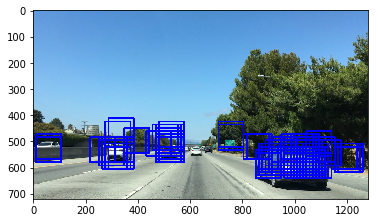

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
%matplotlib inline
#from lesson_functions import *

#loaded_dist = load_svc()
loaded_dist = pickle.load( open("svc_pickle.p", "rb" ) )

svc = loaded_dist["svc"]
X_scaler = loaded_dist["scaler"]
orient = loaded_dist["orient"]
pix_per_cell = loaded_dist["pix_per_cell"]
cell_per_block = loaded_dist["cell_per_block"]
spatial_size = loaded_dist["spatial_size"]
hist_bins = loaded_dist["hist_bins"]

img = mpimg.imread('test_images/bbox-example-image.jpg')

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    bboxes = []
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            #print (spatial_features.shape)
            #print (hist_features.shape)
            #print (hog_features.shape)
            #test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.array(hog_features).reshape(1, -1))
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, bboxes
    
ystart = 400
ystop = 656
scale = 1.5
    
out_img, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
print (len(bboxes))
plt.imshow(out_img)

pickle.dump( bboxes, open( "bbox_pickle.p", "wb" ))

In [ ]:
#find_cars plays

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
%matplotlib inline
#from lesson_functions import *

#loaded_dist = load_svc()
loaded_dist = pickle.load( open("svc_pickle.p", "rb" ) )

svc = loaded_dist["svc"]
X_scaler = loaded_dist["scaler"]
orient = loaded_dist["orient"]
pix_per_cell = loaded_dist["pix_per_cell"]
cell_per_block = loaded_dist["cell_per_block"]
spatial_size = loaded_dist["spatial_size"]
hist_bins = loaded_dist["hist_bins"]

img = mpimg.imread('test_images/bbox-example-image.jpg')

# Define a single function that can extract features using hog sub-sampling and make predictions
#svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins

def find_cars(img, ystart, ystop, scale, color ):
    
    bboxes = []
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            #print (spatial_features.shape)
            #print (hist_features.shape)
            #print (hog_features.shape)
            #test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.array(hog_features).reshape(1, -1))
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),color,6) 
                bboxes.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    return draw_img, bboxes
    
ystart = 400
ystop = 656
xstart = 0
xstop = 1200
scale = 3

bbox_list = []
out_img, bboxes = find_cars(img, ystart=400, ystop=700, scale=1, color=(0,0,255))
print (len(bboxes))
plt.imshow(out_img)

out_img, bboxes = find_cars(img, ystart=400, ystop=700, scale=2, color=(0,255,0))
print (len(bboxes))
plt.imshow(out_img)

out_img, bboxes = find_cars(img, ystart=400, ystop=700, scale=3, color=(255,0,0))
print (len(bboxes))
plt.imshow(out_img)

pickle.dump( bboxes, open( "bbox_pickle.p", "wb" ))

In [ ]:
# Step3 Multiple detection & false positives

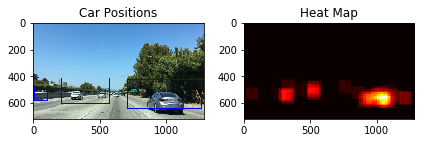

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
image = mpimg.imread('test_images/bbox-example-image.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,0)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


In [ ]:
a = np.array([[0,0,1,1,0,0],
              [0,0,0,1,0,0],
              [1,1,0,0,1,0],
              [0,0,0,1,0,0]])

labeled_array, num_features = label(a)
print (labeled_array)
print (num_features)

In [ ]:
## Output drawing function

In [5]:
def draw_figure(imgs, titles, size=(24, 12), filename='output.jpg'):
    fig, axs = plt.subplots(nrows = len(imgs), ncols = len(imgs[0]), sharex=False, figsize=size)
    for plt_row_index in range(len(imgs)):
        for plt_col_index in range(len(imgs[0])):
            axs[plt_row_index, plt_col_index].imshow(imgs[plt_row_index][plt_col_index])
            axs[plt_row_index, plt_col_index].set_title(titles[plt_row_index][plt_col_index], fontsize=15)
    plt.tight_layout()
    plt.gray()
    fig.savefig(filename)

In [ ]:
##Image processing pipeline

In [ ]:
import glob
%matplotlib inline

# Edit this function to create your own pipeline.
def pipeline(img):
 
    ystart = 400
    ystop = 656
    scale = 1
    window_img, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,0)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
    img_list_temp = []
    img_titles_temp = []
    
    image = mpimg.imread(test_file_name)
    
    img_list_temp.append(image)
    img_titles_temp.append("Input Image")
    
    output_img, heatmap_img, window_img = pipeline(image)

    img_list_temp.append(window_img)
    img_titles_temp.append("Bbox Image")
    img_list_temp.append(heatmap_img)
    img_titles_temp.append("Heatmap Image")
    img_list_temp.append(output_img)
    img_titles_temp.append("Output Image")

    img_list.append(img_list_temp)
    img_titles.append(img_titles_temp)
    
# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/output.jpg')


In [ ]:
# Multiscales pipeline

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

# Edit this function to create your own pipeline.
def pipeline(img, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    print (len(bboxes))
    out_img, heatmap_img = heatmap_output(img, bboxes, threshold) 
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
    
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            output_img, heatmap_img, window_img = pipeline(image, ystart=400, ystop=550, scale=scale, threshold=threshold)

            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')


In [ ]:
# mean for heatmaps

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    print (labels[1])
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

# Edit this function to create your own pipeline.
def pipeline(img, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes1 = find_cars(img, 400, 500, 0.9, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes2 = find_cars(img, ystart, ystop, 1.5, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes3 = find_cars(img, ystart, ystop, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    bboxes = bboxes1 + bboxes2 + bboxes3
    print (len(bboxes))
    
    out_img, heatmap_img = heatmap_output(img, bboxes, threshold=9) 
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
    
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            output_img, heatmap_img, window_img = pipeline(image, ystart=400, ystop=550, scale=scale, threshold=threshold)

            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')

In [ ]:
# Best approach for all test pictures

In [ ]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    print (labels[1])
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

# Edit this function to create your own pipeline.
def pipeline(img, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes1 = find_cars(img, ystart, ystop, 1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes2 = find_cars(img, ystart, ystop, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    bboxes = bboxes1 + bboxes2
    print (len(bboxes))
    
    out_img, heatmap_img = heatmap_output(img, bboxes, threshold=1) 
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
    
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            output_img, heatmap_img, window_img = pipeline(image, ystart=400, ystop=550, scale=scale, threshold=threshold)

            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')

In [ ]:
# VIDEO PIPELINE with mean heat

Init


C:\Users\srogawsk\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Number of bboxes: 16
Before 0
After 1
Number of bboxes: 16
2
Number of bbox entries in tracker: 1
1.13495 Seconds to predict
Number of bboxes: 0
Before 1
After 2
Number of bboxes: 16
2
Number of bbox entries in tracker: 2
1.02667 Seconds to predict
Number of bboxes: 5
Before 2
After 3
Number of bboxes: 21
2
Number of bbox entries in tracker: 3
1.07016 Seconds to predict
Number of bboxes: 15
Before 3
After 4
Number of bboxes: 36
2
Number of bbox entries in tracker: 4
0.95315 Seconds to predict
Number of bboxes: 23
Before 4
After 5
Number of bboxes: 59
2
Number of bbox entries in tracker: 5
0.95521 Seconds to predict
Number of bboxes: 12
Before 4
After 5
Number of bboxes: 55
2
Number of bbox entries in tracker: 5
0.94481 Seconds to predict


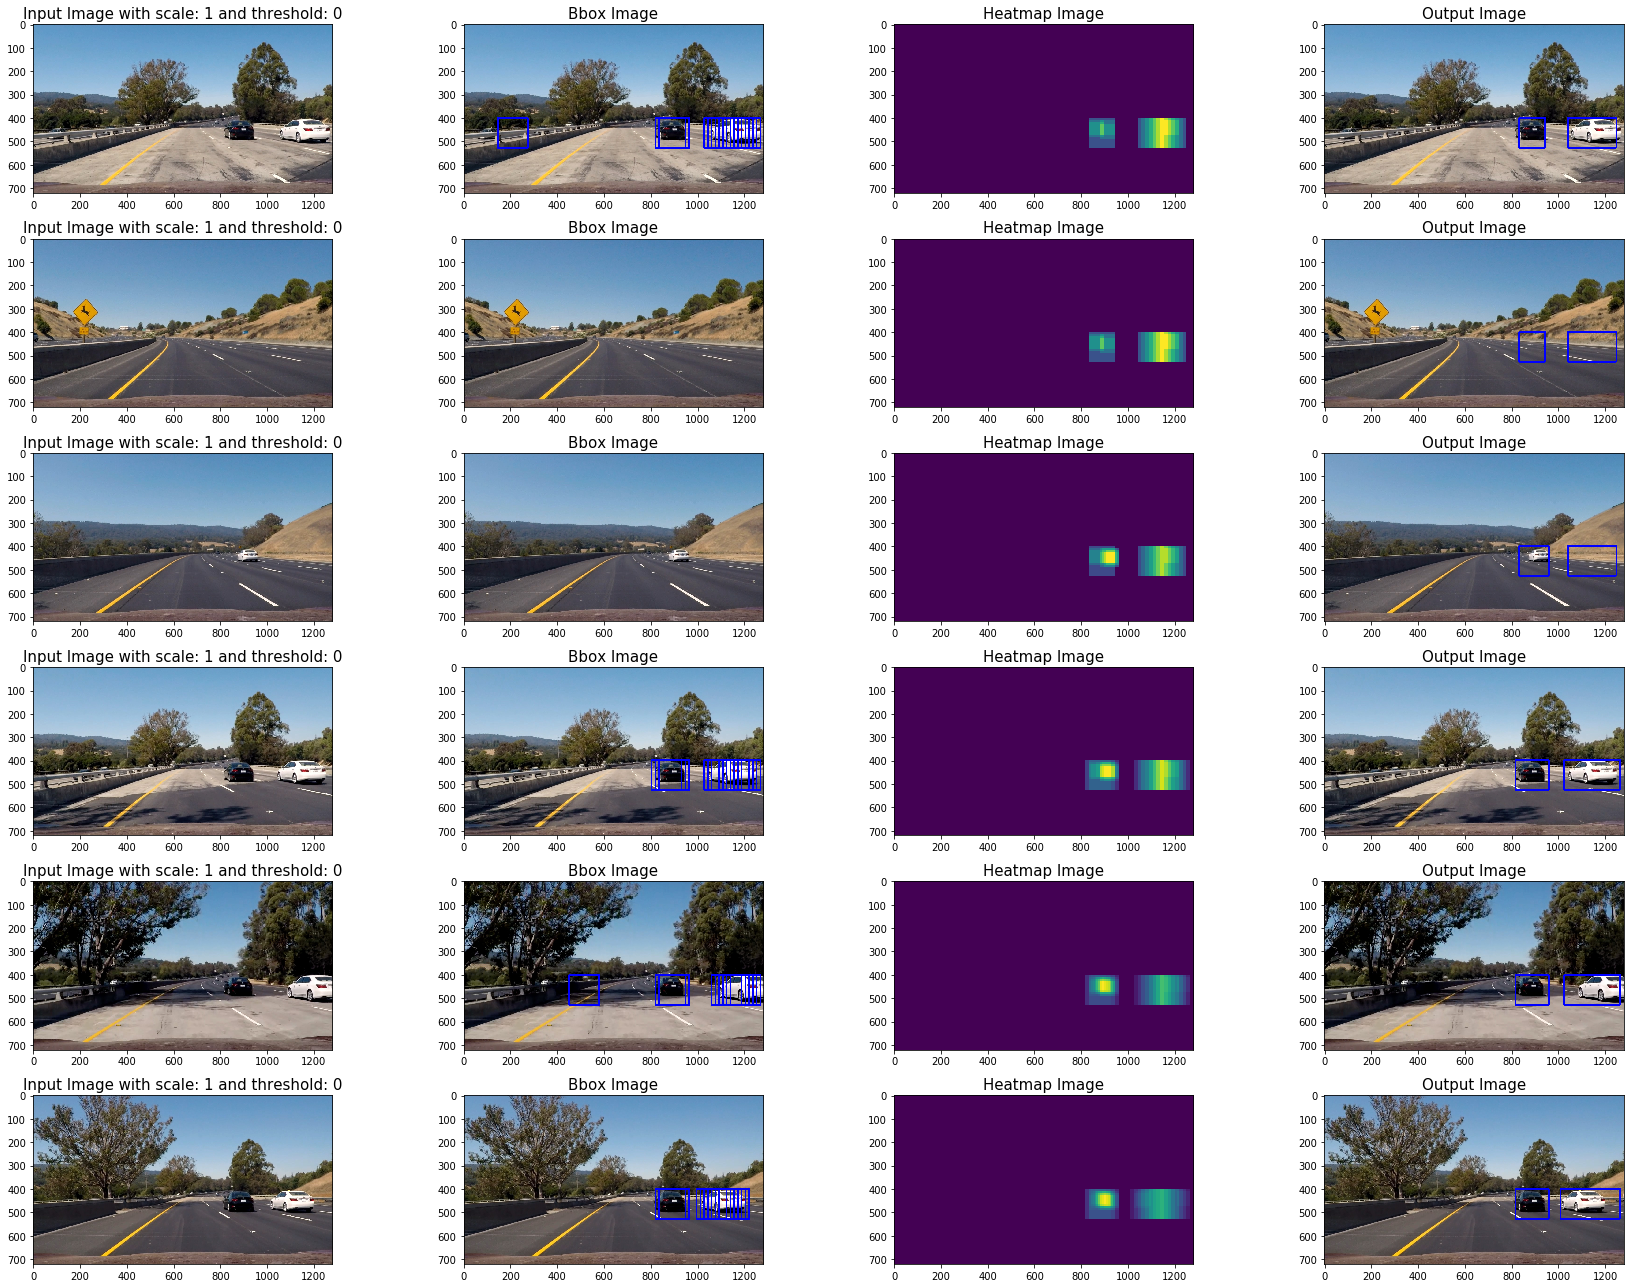

In [6]:
import glob
import time
%matplotlib inline

def heatmap_output(img, bboxes, threshold=0):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat, bboxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,threshold)
    # Visualize the heatmap when displaying    
    heatmap_img = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap_img)
    print (labels[1])
    out_img = draw_labeled_bboxes(np.copy(img), labels)    
    return out_img, heatmap_img

class BoundingBoxTracker():
    def __init__(self, limit):
        print ("Init")
        self.bbox_list = []
        self.bbox_num = []
        self.limit = limit
    def push(self, bboxes):
        if len(self.bbox_list) >= self.limit:
            self.pop(0)
        self.bbox_list.append(bboxes)
        print ("Before "+ str(len(self.bbox_num)))
        self.bbox_num.append(len(bboxes))
        print ("After " + str(len(self.bbox_num)))
    def pop(self, index):
        self.bbox_list.pop(index)
        self.bbox_num.pop(index)
    def get_state(self):
        return self.bbox_list, len(self.bbox_num)
    def clean(self):
        self.__init__()

# Edit this function to create your own pipeline.
def pipeline(img, bbtracker, ystart=400, ystop=656, scale=1, threshold=0):
    window_img, bboxes1 = find_cars(img, ystart, 500, 1, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    window_img, bboxes2 = find_cars(img, ystart, ystop, 2, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    bboxes = bboxes1 + bboxes2
    #bboxes = bboxes2
    print ("Number of bboxes: " + str(len(bboxes)))
    
    bbtracker.push(bboxes)
    
    bb_list, bb_num = bbtracker.get_state()
    bbout = []
    for bbox in bb_list:
        bbout += bbox
    print ("Number of bboxes:", str(len(bbout)))
    #out_img, heatmap_img = heatmap_output(img, bbout, threshold=bb_num-1) 
    out_img, heatmap_img = heatmap_output(img, bbout, threshold=1) 
    
    return out_img, heatmap_img, window_img 

test_file_names = glob.glob('test_images/test*.jpg')

input_img_list = []
window_img_list = []
heatmap_img_list = []
output_img_list = []

img_list = []
img_titles = []
bbtracker = BoundingBoxTracker(5)

for test_file_name in test_file_names:
 
    image = mpimg.imread(test_file_name)
   
    scales = [1]
    thresholds = [0]
    for scale in scales:
        for threshold in thresholds:
            img_list_temp = []
            img_titles_temp = []

            img_list_temp.append(image)
            img_titles_temp.append("Input Image with scale: " + str(scale) + " and threshold: " + str(threshold))

            t = time.time()
            
            output_img, heatmap_img, window_img = pipeline(image, bbtracker, ystart=400, ystop=550, scale=scale, threshold=threshold)

            bb, num = bbtracker.get_state()
            print ("Number of bbox entries in tracker: " + str(num))
            t2 = time.time()
            print(round(t2-t, 5), 'Seconds to predict')

            img_list_temp.append(window_img)
            img_titles_temp.append("Bbox Image")
            img_list_temp.append(heatmap_img)
            img_titles_temp.append("Heatmap Image")
            img_list_temp.append(output_img)
            img_titles_temp.append("Output Image")

            img_list.append(img_list_temp)
            img_titles.append(img_titles_temp)

# for visualization
draw_figure(img_list, img_titles , size=(24, 18), filename='./output_images/multi_output.jpg')

In [7]:
## Test on Videos

In [8]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [9]:
bbtracker = BoundingBoxTracker(10)
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    output_img, heatmap_img, window_img = pipeline(image, bbtracker, ystart=400, ystop=656, scale=2, threshold=0)
    return output_img

Init


In [10]:
white_output = './project_video_out_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("./project_video_out.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Number of bboxes: 0
Before 0
After 1
Number of bboxes: 0
0
[MoviePy] >>>> Building video ./project_video_out_out.mp4
[MoviePy] Writing video ./project_video_out_out.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

Number of bboxes: 0
Before 1
After 2
Number of bboxes: 0
0


  0%|                                                                                 | 1/1261 [00:01<33:35,  1.60s/it]

Number of bboxes: 0
Before 2
After 3
Number of bboxes: 0
0


  0%|▏                                                                                | 2/1261 [00:03<33:04,  1.58s/it]

Number of bboxes: 0
Before 3
After 4
Number of bboxes: 0
0


  0%|▏                                                                                | 3/1261 [00:04<33:41,  1.61s/it]

Number of bboxes: 0
Before 4
After 5
Number of bboxes: 0
0


  0%|▎                                                                                | 4/1261 [00:06<32:49,  1.57s/it]

Number of bboxes: 0
Before 5
After 6
Number of bboxes: 0
0


  0%|▎                                                                                | 5/1261 [00:07<32:04,  1.53s/it]

Number of bboxes: 0
Before 6
After 7
Number of bboxes: 0
0


  0%|▍                                                                                | 6/1261 [00:09<33:20,  1.59s/it]

Number of bboxes: 0
Before 7
After 8
Number of bboxes: 0
0


  1%|▍                                                                                | 7/1261 [00:11<33:03,  1.58s/it]

Number of bboxes: 0
Before 8
After 9
Number of bboxes: 0
0


  1%|▌                                                                                | 8/1261 [00:12<32:35,  1.56s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▌                                                                                | 9/1261 [00:14<33:33,  1.61s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▋                                                                               | 10/1261 [00:15<32:56,  1.58s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▋                                                                               | 11/1261 [00:17<32:11,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▊                                                                               | 12/1261 [00:18<31:51,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▊                                                                               | 13/1261 [00:20<31:44,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▉                                                                               | 14/1261 [00:21<31:20,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|▉                                                                               | 15/1261 [00:23<31:20,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|█                                                                               | 16/1261 [00:25<33:19,  1.61s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|█                                                                               | 17/1261 [00:26<32:09,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  1%|█▏                                                                              | 18/1261 [00:27<31:24,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▏                                                                              | 19/1261 [00:29<30:57,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▎                                                                              | 20/1261 [00:30<30:47,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▎                                                                              | 21/1261 [00:32<30:50,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▍                                                                              | 22/1261 [00:33<30:43,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▍                                                                              | 23/1261 [00:35<30:22,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▌                                                                              | 24/1261 [00:36<30:16,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  2%|█▌                                                                              | 25/1261 [00:38<31:38,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 1
0


  2%|█▋                                                                              | 26/1261 [00:40<33:14,  1.61s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  2%|█▋                                                                              | 27/1261 [00:41<33:57,  1.65s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  2%|█▊                                                                              | 28/1261 [00:43<33:44,  1.64s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  2%|█▊                                                                              | 29/1261 [00:45<33:41,  1.64s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  2%|█▉                                                                              | 30/1261 [00:46<32:50,  1.60s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  2%|█▉                                                                              | 31/1261 [00:48<31:41,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  3%|██                                                                              | 32/1261 [00:49<31:30,  1.54s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  3%|██                                                                              | 33/1261 [00:51<31:03,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  3%|██▏                                                                             | 34/1261 [00:52<30:35,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


  3%|██▏                                                                             | 35/1261 [00:54<30:26,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▎                                                                             | 36/1261 [00:55<30:01,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▎                                                                             | 37/1261 [00:56<29:31,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▍                                                                             | 38/1261 [00:58<29:23,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▍                                                                             | 39/1261 [00:59<29:18,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▌                                                                             | 40/1261 [01:01<29:15,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▌                                                                             | 41/1261 [01:02<29:10,  1.43s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▋                                                                             | 42/1261 [01:04<29:15,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▋                                                                             | 43/1261 [01:05<29:17,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  3%|██▊                                                                             | 44/1261 [01:06<29:09,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|██▊                                                                             | 45/1261 [01:08<29:11,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|██▉                                                                             | 46/1261 [01:09<29:04,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|██▉                                                                             | 47/1261 [01:11<28:57,  1.43s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███                                                                             | 48/1261 [01:12<29:04,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███                                                                             | 49/1261 [01:14<29:10,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▏                                                                            | 50/1261 [01:15<29:09,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▏                                                                            | 51/1261 [01:16<29:04,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▎                                                                            | 52/1261 [01:18<30:00,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▎                                                                            | 53/1261 [01:20<29:36,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▍                                                                            | 54/1261 [01:21<29:38,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▍                                                                            | 55/1261 [01:22<29:25,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  4%|███▌                                                                            | 56/1261 [01:24<29:37,  1.48s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▌                                                                            | 57/1261 [01:26<31:31,  1.57s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▋                                                                            | 58/1261 [01:27<30:55,  1.54s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▋                                                                            | 59/1261 [01:29<30:34,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▊                                                                            | 60/1261 [01:30<30:43,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▊                                                                            | 61/1261 [01:32<30:21,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▉                                                                            | 62/1261 [01:33<30:48,  1.54s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|███▉                                                                            | 63/1261 [01:35<30:07,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|████                                                                            | 64/1261 [01:36<29:36,  1.48s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|████                                                                            | 65/1261 [01:38<29:17,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|████▏                                                                           | 66/1261 [01:39<29:27,  1.48s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|████▎                                                                           | 67/1261 [01:41<29:08,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|████▎                                                                           | 68/1261 [01:42<29:16,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  5%|████▍                                                                           | 69/1261 [01:44<29:20,  1.48s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▍                                                                           | 70/1261 [01:45<29:02,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▌                                                                           | 71/1261 [01:46<28:51,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▌                                                                           | 72/1261 [01:48<28:42,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▋                                                                           | 73/1261 [01:49<28:36,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▋                                                                           | 74/1261 [01:51<28:34,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▊                                                                           | 75/1261 [01:52<28:33,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▊                                                                           | 76/1261 [01:54<28:33,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▉                                                                           | 77/1261 [01:55<28:26,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|████▉                                                                           | 78/1261 [01:56<28:26,  1.44s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|█████                                                                           | 79/1261 [01:58<28:45,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|█████                                                                           | 80/1261 [01:59<28:31,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  6%|█████▏                                                                          | 81/1261 [02:01<28:36,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▏                                                                          | 82/1261 [02:03<31:13,  1.59s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▎                                                                          | 83/1261 [02:04<30:26,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▎                                                                          | 84/1261 [02:06<29:50,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▍                                                                          | 85/1261 [02:07<29:22,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▍                                                                          | 86/1261 [02:09<29:16,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▌                                                                          | 87/1261 [02:10<29:04,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▌                                                                          | 88/1261 [02:12<28:44,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▋                                                                          | 89/1261 [02:13<28:52,  1.48s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▋                                                                          | 90/1261 [02:14<28:37,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▊                                                                          | 91/1261 [02:16<28:27,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▊                                                                          | 92/1261 [02:17<28:21,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▉                                                                          | 93/1261 [02:19<28:21,  1.46s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  7%|█████▉                                                                          | 94/1261 [02:20<28:08,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████                                                                          | 95/1261 [02:22<28:12,  1.45s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████                                                                          | 96/1261 [02:23<28:56,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▏                                                                         | 97/1261 [02:25<28:29,  1.47s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▏                                                                         | 98/1261 [02:27<30:44,  1.59s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▎                                                                         | 99/1261 [02:28<30:19,  1.57s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▎                                                                        | 100/1261 [02:30<29:44,  1.54s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▎                                                                        | 101/1261 [02:31<29:37,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▍                                                                        | 102/1261 [02:33<29:23,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▍                                                                        | 103/1261 [02:34<29:33,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▌                                                                        | 104/1261 [02:36<29:08,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▌                                                                        | 105/1261 [02:37<30:29,  1.58s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▋                                                                        | 106/1261 [02:39<30:02,  1.56s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  8%|██████▋                                                                        | 107/1261 [02:40<29:31,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|██████▊                                                                        | 108/1261 [02:42<29:12,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|██████▊                                                                        | 109/1261 [02:43<29:11,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|██████▉                                                                        | 110/1261 [02:45<28:58,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|██████▉                                                                        | 111/1261 [02:46<28:54,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████                                                                        | 112/1261 [02:48<28:48,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████                                                                        | 113/1261 [02:49<28:49,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████▏                                                                       | 114/1261 [02:51<28:32,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████▏                                                                       | 115/1261 [02:52<28:34,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████▎                                                                       | 116/1261 [02:54<28:46,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████▎                                                                       | 117/1261 [02:55<28:30,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████▍                                                                       | 118/1261 [02:57<28:29,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


  9%|███████▍                                                                       | 119/1261 [02:58<28:41,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▌                                                                       | 120/1261 [03:00<28:26,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▌                                                                       | 121/1261 [03:01<28:22,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▋                                                                       | 122/1261 [03:03<28:18,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▋                                                                       | 123/1261 [03:04<28:25,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▊                                                                       | 124/1261 [03:06<28:22,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▊                                                                       | 125/1261 [03:07<28:24,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▉                                                                       | 126/1261 [03:09<28:33,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|███████▉                                                                       | 127/1261 [03:10<28:19,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 10%|████████                                                                       | 128/1261 [03:12<28:17,  1.50s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 1
0


 10%|████████                                                                       | 129/1261 [03:13<28:17,  1.50s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 2
1


 10%|████████▏                                                                      | 130/1261 [03:15<28:18,  1.50s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 4
1


 10%|████████▏                                                                      | 131/1261 [03:16<28:26,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 6
1


 10%|████████▎                                                                      | 132/1261 [03:18<28:24,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 6
1


 11%|████████▎                                                                      | 133/1261 [03:19<28:23,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 6
1


 11%|████████▍                                                                      | 134/1261 [03:21<28:25,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 6
1


 11%|████████▍                                                                      | 135/1261 [03:22<28:21,  1.51s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 9
2


 11%|████████▌                                                                      | 136/1261 [03:24<28:20,  1.51s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 14
2


 11%|████████▌                                                                      | 137/1261 [03:25<28:15,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 14
2


 11%|████████▋                                                                      | 138/1261 [03:27<29:29,  1.58s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 13
2


 11%|████████▋                                                                      | 139/1261 [03:29<31:03,  1.66s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 12
2


 11%|████████▊                                                                      | 140/1261 [03:30<30:14,  1.62s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 10
3


 11%|████████▊                                                                      | 141/1261 [03:32<29:35,  1.59s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 9
2


 11%|████████▉                                                                      | 142/1261 [03:34<29:22,  1.58s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 9
2


 11%|████████▉                                                                      | 143/1261 [03:35<28:57,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 9
2


 11%|█████████                                                                      | 144/1261 [03:37<28:31,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 9
2


 11%|█████████                                                                      | 145/1261 [03:38<28:30,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 6
2


 12%|█████████▏                                                                     | 146/1261 [03:40<28:15,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


 12%|█████████▏                                                                     | 147/1261 [03:41<28:06,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


 12%|█████████▎                                                                     | 148/1261 [03:43<27:58,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


 12%|█████████▎                                                                     | 149/1261 [03:44<28:10,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


 12%|█████████▍                                                                     | 150/1261 [03:46<28:09,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 1
0


 12%|█████████▍                                                                     | 151/1261 [03:47<27:49,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 12%|█████████▌                                                                     | 152/1261 [03:49<28:02,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 12%|█████████▌                                                                     | 153/1261 [03:50<27:49,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 12%|█████████▋                                                                     | 154/1261 [03:52<27:58,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 12%|█████████▋                                                                     | 155/1261 [03:53<28:05,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 12%|█████████▊                                                                     | 156/1261 [03:55<27:54,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 12%|█████████▊                                                                     | 157/1261 [03:56<27:40,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|█████████▉                                                                     | 158/1261 [03:58<27:33,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|█████████▉                                                                     | 159/1261 [03:59<27:31,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████                                                                     | 160/1261 [04:01<27:20,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████                                                                     | 161/1261 [04:02<27:13,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▏                                                                    | 162/1261 [04:04<27:34,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▏                                                                    | 163/1261 [04:05<27:21,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▎                                                                    | 164/1261 [04:07<27:24,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▎                                                                    | 165/1261 [04:08<27:32,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▍                                                                    | 166/1261 [04:10<27:34,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▍                                                                    | 167/1261 [04:11<27:17,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▌                                                                    | 168/1261 [04:13<27:12,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▌                                                                    | 169/1261 [04:14<27:20,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 13%|██████████▋                                                                    | 170/1261 [04:16<27:15,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 14%|██████████▋                                                                    | 171/1261 [04:17<27:03,  1.49s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 14%|██████████▊                                                                    | 172/1261 [04:19<27:17,  1.50s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 0
0


 14%|██████████▊                                                                    | 173/1261 [04:20<27:14,  1.50s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 1
0


 14%|██████████▉                                                                    | 174/1261 [04:22<27:02,  1.49s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 3
1


 14%|██████████▉                                                                    | 175/1261 [04:23<27:10,  1.50s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 7
1


 14%|███████████                                                                    | 176/1261 [04:25<27:00,  1.49s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 10
1


 14%|███████████                                                                    | 177/1261 [04:26<26:54,  1.49s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 15
1


 14%|███████████▏                                                                   | 178/1261 [04:28<27:08,  1.50s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 20
1


 14%|███████████▏                                                                   | 179/1261 [04:30<29:32,  1.64s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 26
1


 14%|███████████▎                                                                   | 180/1261 [04:31<29:05,  1.61s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 33
1


 14%|███████████▎                                                                   | 181/1261 [04:33<29:16,  1.63s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 37
1


 14%|███████████▍                                                                   | 182/1261 [04:34<28:53,  1.61s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 40
1


 15%|███████████▍                                                                   | 183/1261 [04:36<28:55,  1.61s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 43
1


 15%|███████████▌                                                                   | 184/1261 [04:38<28:43,  1.60s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 45
1


 15%|███████████▌                                                                   | 185/1261 [04:39<28:52,  1.61s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 48
1


 15%|███████████▋                                                                   | 186/1261 [04:41<28:57,  1.62s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 52
1


 15%|███████████▋                                                                   | 187/1261 [04:42<28:33,  1.60s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 55
1


 15%|███████████▊                                                                   | 188/1261 [04:44<28:29,  1.59s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 57
1


 15%|███████████▊                                                                   | 189/1261 [04:46<28:18,  1.58s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 60
1


 15%|███████████▉                                                                   | 190/1261 [04:47<28:10,  1.58s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 62
1


 15%|███████████▉                                                                   | 191/1261 [04:49<28:14,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 65
1


 15%|████████████                                                                   | 192/1261 [04:50<27:50,  1.56s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 71
1


 15%|████████████                                                                   | 193/1261 [04:52<27:50,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 73
1


 15%|████████████▏                                                                  | 194/1261 [04:53<28:18,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 75
1


 15%|████████████▏                                                                  | 195/1261 [04:55<28:03,  1.58s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 74
1


 16%|████████████▎                                                                  | 196/1261 [04:57<27:56,  1.57s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 71
1


 16%|████████████▎                                                                  | 197/1261 [04:58<28:10,  1.59s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 66
1


 16%|████████████▍                                                                  | 198/1261 [05:00<28:01,  1.58s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 62
1


 16%|████████████▍                                                                  | 199/1261 [05:01<27:46,  1.57s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 57
1


 16%|████████████▌                                                                  | 200/1261 [05:03<27:38,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 52
1


 16%|████████████▌                                                                  | 201/1261 [05:04<27:34,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 50
1


 16%|████████████▋                                                                  | 202/1261 [05:06<27:26,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 48
1


 16%|████████████▋                                                                  | 203/1261 [05:07<27:23,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 49
1


 16%|████████████▊                                                                  | 204/1261 [05:09<27:29,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 50
1


 16%|████████████▊                                                                  | 205/1261 [05:11<27:20,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 49
1


 16%|████████████▉                                                                  | 206/1261 [05:12<27:45,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 52
1


 16%|████████████▉                                                                  | 207/1261 [05:14<27:25,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 56
1


 16%|█████████████                                                                  | 208/1261 [05:15<27:03,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 60
1


 17%|█████████████                                                                  | 209/1261 [05:17<27:01,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 63
1


 17%|█████████████▏                                                                 | 210/1261 [05:18<27:01,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 62
1


 17%|█████████████▏                                                                 | 211/1261 [05:20<26:35,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 60
1


 17%|█████████████▎                                                                 | 212/1261 [05:21<26:35,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 56
1


 17%|█████████████▎                                                                 | 213/1261 [05:23<26:41,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 53
1


 17%|█████████████▍                                                                 | 214/1261 [05:24<26:50,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 50
1


 17%|█████████████▍                                                                 | 215/1261 [05:26<26:58,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 51
1


 17%|█████████████▌                                                                 | 216/1261 [05:28<27:10,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 49
1


 17%|█████████████▌                                                                 | 217/1261 [05:29<28:11,  1.62s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 47
1


 17%|█████████████▋                                                                 | 218/1261 [05:31<28:43,  1.65s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 44
1


 17%|█████████████▋                                                                 | 219/1261 [05:33<27:53,  1.61s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 41
1


 17%|█████████████▊                                                                 | 220/1261 [05:34<28:13,  1.63s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 42
1


 18%|█████████████▊                                                                 | 221/1261 [05:36<27:21,  1.58s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 45
1


 18%|█████████████▉                                                                 | 222/1261 [05:37<27:01,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 46
1


 18%|█████████████▉                                                                 | 223/1261 [05:39<27:29,  1.59s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 47
1


 18%|██████████████                                                                 | 224/1261 [05:40<27:02,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 50
1


 18%|██████████████                                                                 | 225/1261 [05:42<26:53,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 50
1


 18%|██████████████▏                                                                | 226/1261 [05:44<27:38,  1.60s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 53
1


 18%|██████████████▏                                                                | 227/1261 [05:45<27:01,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 56
1


 18%|██████████████▎                                                                | 228/1261 [05:47<26:37,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 59
1


 18%|██████████████▎                                                                | 229/1261 [05:48<26:48,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 18%|██████████████▍                                                                | 230/1261 [05:50<26:47,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 61
1


 18%|██████████████▍                                                                | 231/1261 [05:51<26:30,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 62
1


 18%|██████████████▌                                                                | 232/1261 [05:53<26:21,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 63
1


 18%|██████████████▌                                                                | 233/1261 [05:54<26:21,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 66
1


 19%|██████████████▋                                                                | 234/1261 [05:56<26:13,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 65
1


 19%|██████████████▋                                                                | 235/1261 [05:57<26:10,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 65
1


 19%|██████████████▊                                                                | 236/1261 [05:59<26:10,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 19%|██████████████▊                                                                | 237/1261 [06:00<26:09,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 62
1


 19%|██████████████▉                                                                | 238/1261 [06:02<25:52,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 61
1


 19%|██████████████▉                                                                | 239/1261 [06:03<25:58,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 61
1


 19%|███████████████                                                                | 240/1261 [06:05<25:54,  1.52s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 63
1


 19%|███████████████                                                                | 241/1261 [06:06<25:52,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 60
1


 19%|███████████████▏                                                               | 242/1261 [06:08<26:02,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 19%|███████████████▏                                                               | 243/1261 [06:10<25:56,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 56
1


 19%|███████████████▎                                                               | 244/1261 [06:11<25:56,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 54
1


 19%|███████████████▎                                                               | 245/1261 [06:13<25:43,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 54
1


 20%|███████████████▍                                                               | 246/1261 [06:14<25:43,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 54
1


 20%|███████████████▍                                                               | 247/1261 [06:16<25:42,  1.52s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 54
1


 20%|███████████████▌                                                               | 248/1261 [06:17<25:31,  1.51s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 55
1


 20%|███████████████▌                                                               | 249/1261 [06:19<25:37,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 55
1


 20%|███████████████▋                                                               | 250/1261 [06:20<25:27,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 50
1


 20%|███████████████▋                                                               | 251/1261 [06:22<25:25,  1.51s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 50
1


 20%|███████████████▊                                                               | 252/1261 [06:23<25:30,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 47
1


 20%|███████████████▊                                                               | 253/1261 [06:25<25:30,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 47
1


 20%|███████████████▉                                                               | 254/1261 [06:26<25:20,  1.51s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 46
1


 20%|███████████████▉                                                               | 255/1261 [06:28<25:15,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 42
1


 20%|████████████████                                                               | 256/1261 [06:29<25:21,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 38
1


 20%|████████████████                                                               | 257/1261 [06:31<26:54,  1.61s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 35
1


 20%|████████████████▏                                                              | 258/1261 [06:33<26:23,  1.58s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 31
1


 21%|████████████████▏                                                              | 259/1261 [06:34<26:19,  1.58s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 32
1


 21%|████████████████▎                                                              | 260/1261 [06:36<25:50,  1.55s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 34
1


 21%|████████████████▎                                                              | 261/1261 [06:37<26:43,  1.60s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 36
1


 21%|████████████████▍                                                              | 262/1261 [06:39<27:41,  1.66s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 42
1


 21%|████████████████▍                                                              | 263/1261 [06:41<29:47,  1.79s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 47
1


 21%|████████████████▌                                                              | 264/1261 [06:43<31:25,  1.89s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 53
1


 21%|████████████████▌                                                              | 265/1261 [06:45<29:23,  1.77s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 56
1


 21%|████████████████▋                                                              | 266/1261 [06:46<27:57,  1.69s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 60
1


 21%|████████████████▋                                                              | 267/1261 [06:48<27:02,  1.63s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 21%|████████████████▊                                                              | 268/1261 [06:49<26:18,  1.59s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 62
1


 21%|████████████████▊                                                              | 269/1261 [06:51<25:50,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 61
1


 21%|████████████████▉                                                              | 270/1261 [06:52<25:27,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 21%|████████████████▉                                                              | 271/1261 [06:54<25:23,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 63
1


 22%|█████████████████                                                              | 272/1261 [06:55<25:08,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 63
1


 22%|█████████████████                                                              | 273/1261 [06:57<25:07,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 61
1


 22%|█████████████████▏                                                             | 274/1261 [06:58<25:04,  1.52s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 60
1


 22%|█████████████████▏                                                             | 275/1261 [07:00<24:54,  1.52s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 66
1


 22%|█████████████████▎                                                             | 276/1261 [07:01<24:48,  1.51s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 72
1


 22%|█████████████████▎                                                             | 277/1261 [07:03<25:05,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 73
1


 22%|█████████████████▍                                                             | 278/1261 [07:05<25:06,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 77
1


 22%|█████████████████▍                                                             | 279/1261 [07:06<25:16,  1.54s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 82
1


 22%|█████████████████▌                                                             | 280/1261 [07:08<25:54,  1.58s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 86
1


 22%|█████████████████▌                                                             | 281/1261 [07:09<26:23,  1.62s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 89
1


 22%|█████████████████▋                                                             | 282/1261 [07:11<26:10,  1.60s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 89
1


 22%|█████████████████▋                                                             | 283/1261 [07:13<25:42,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 89
1


 23%|█████████████████▊                                                             | 284/1261 [07:14<25:31,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 89
1


 23%|█████████████████▊                                                             | 285/1261 [07:16<26:00,  1.60s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 85
1


 23%|█████████████████▉                                                             | 286/1261 [07:17<26:12,  1.61s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 81
1


 23%|█████████████████▉                                                             | 287/1261 [07:19<26:35,  1.64s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 86
1


 23%|██████████████████                                                             | 288/1261 [07:21<25:49,  1.59s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 88
1


 23%|██████████████████                                                             | 289/1261 [07:22<25:17,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 85
1


 23%|██████████████████▏                                                            | 290/1261 [07:24<25:18,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 82
1


 23%|██████████████████▏                                                            | 291/1261 [07:25<24:56,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 80
1


 23%|██████████████████▎                                                            | 292/1261 [07:27<24:30,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 78
1


 23%|██████████████████▎                                                            | 293/1261 [07:28<24:41,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 78
1


 23%|██████████████████▍                                                            | 294/1261 [07:30<24:31,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 75
1


 23%|██████████████████▍                                                            | 295/1261 [07:31<25:02,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 72
1


 23%|██████████████████▌                                                            | 296/1261 [07:33<26:11,  1.63s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 68
1


 24%|██████████████████▌                                                            | 297/1261 [07:35<25:29,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 24%|██████████████████▋                                                            | 298/1261 [07:36<25:01,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 59
1


 24%|██████████████████▋                                                            | 299/1261 [07:38<24:38,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 58
1


 24%|██████████████████▊                                                            | 300/1261 [07:39<24:37,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 60
1


 24%|██████████████████▊                                                            | 301/1261 [07:41<24:18,  1.52s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 61
1


 24%|██████████████████▉                                                            | 302/1261 [07:42<24:22,  1.53s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 64
1


 24%|██████████████████▉                                                            | 303/1261 [07:44<24:37,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 66
1


 24%|███████████████████                                                            | 304/1261 [07:45<24:20,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 68
1


 24%|███████████████████                                                            | 305/1261 [07:47<24:19,  1.53s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 75
1


 24%|███████████████████▏                                                           | 306/1261 [07:48<25:04,  1.58s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 79
1


 24%|███████████████████▏                                                           | 307/1261 [07:50<24:38,  1.55s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 82
1


 24%|███████████████████▎                                                           | 308/1261 [07:51<24:23,  1.54s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 86
1


 25%|███████████████████▎                                                           | 309/1261 [07:53<24:27,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 89
1


 25%|███████████████████▍                                                           | 310/1261 [07:54<24:03,  1.52s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 94
1


 25%|███████████████████▍                                                           | 311/1261 [07:56<24:00,  1.52s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 96
1


 25%|███████████████████▌                                                           | 312/1261 [07:57<23:51,  1.51s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 98
1


 25%|███████████████████▌                                                           | 313/1261 [07:59<23:59,  1.52s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 99
1


 25%|███████████████████▋                                                           | 314/1261 [08:00<23:44,  1.50s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 97
1


 25%|███████████████████▋                                                           | 315/1261 [08:02<23:40,  1.50s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 90
1


 25%|███████████████████▊                                                           | 316/1261 [08:03<23:44,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 88
1


 25%|███████████████████▊                                                           | 317/1261 [08:05<23:38,  1.50s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 84
1


 25%|███████████████████▉                                                           | 318/1261 [08:06<23:34,  1.50s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 81
1


 25%|███████████████████▉                                                           | 319/1261 [08:08<23:46,  1.51s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 75
1


 25%|████████████████████                                                           | 320/1261 [08:09<23:40,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 68
1


 25%|████████████████████                                                           | 321/1261 [08:11<23:28,  1.50s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 69
1


 26%|████████████████████▏                                                          | 322/1261 [08:12<23:28,  1.50s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 65
1


 26%|████████████████████▏                                                          | 323/1261 [08:14<23:39,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 61
1


 26%|████████████████████▎                                                          | 324/1261 [08:16<23:32,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 26%|████████████████████▎                                                          | 325/1261 [08:17<23:22,  1.50s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 63
1


 26%|████████████████████▍                                                          | 326/1261 [08:19<23:30,  1.51s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 26%|████████████████████▍                                                          | 327/1261 [08:20<23:36,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 26%|████████████████████▌                                                          | 328/1261 [08:22<23:23,  1.50s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 26%|████████████████████▌                                                          | 329/1261 [08:23<23:24,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 26%|████████████████████▋                                                          | 330/1261 [08:25<23:21,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 26%|████████████████████▋                                                          | 331/1261 [08:26<23:16,  1.50s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 59
1


 26%|████████████████████▊                                                          | 332/1261 [08:28<23:15,  1.50s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 60
1


 26%|████████████████████▊                                                          | 333/1261 [08:29<23:23,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 60
1


 26%|████████████████████▉                                                          | 334/1261 [08:31<23:10,  1.50s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 65
1


 27%|████████████████████▉                                                          | 335/1261 [08:32<23:11,  1.50s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 67
1


 27%|█████████████████████                                                          | 336/1261 [08:34<25:12,  1.63s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 71
1


 27%|█████████████████████                                                          | 337/1261 [08:35<24:33,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 72
1


 27%|█████████████████████▏                                                         | 338/1261 [08:37<24:08,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 73
1


 27%|█████████████████████▏                                                         | 339/1261 [08:39<23:56,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 72
1


 27%|█████████████████████▎                                                         | 340/1261 [08:40<23:31,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 68
1


 27%|█████████████████████▎                                                         | 341/1261 [08:42<23:23,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 68
1


 27%|█████████████████████▍                                                         | 342/1261 [08:43<23:21,  1.52s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 67
1


 27%|█████████████████████▍                                                         | 343/1261 [08:45<23:11,  1.52s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 72
1


 27%|█████████████████████▌                                                         | 344/1261 [08:46<23:08,  1.51s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 72
1


 27%|█████████████████████▌                                                         | 345/1261 [08:48<23:14,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 70
1


 27%|█████████████████████▋                                                         | 346/1261 [08:49<23:16,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 66
1


 28%|█████████████████████▋                                                         | 347/1261 [08:51<23:08,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 63
1


 28%|█████████████████████▊                                                         | 348/1261 [08:52<23:00,  1.51s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 60
1


 28%|█████████████████████▊                                                         | 349/1261 [08:54<23:39,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 28%|█████████████████████▉                                                         | 350/1261 [08:55<23:19,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 62
1


 28%|█████████████████████▉                                                         | 351/1261 [08:57<23:09,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 59
1


 28%|██████████████████████                                                         | 352/1261 [08:58<23:01,  1.52s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 59
1


 28%|██████████████████████                                                         | 353/1261 [09:00<22:56,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 52
1


 28%|██████████████████████▏                                                        | 354/1261 [09:01<22:49,  1.51s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 48
1


 28%|██████████████████████▏                                                        | 355/1261 [09:03<22:44,  1.51s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 50
1


 28%|██████████████████████▎                                                        | 356/1261 [09:04<22:49,  1.51s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 52
1


 28%|██████████████████████▎                                                        | 357/1261 [09:06<22:42,  1.51s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 57
1


 28%|██████████████████████▍                                                        | 358/1261 [09:07<22:36,  1.50s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 60
1


 28%|██████████████████████▍                                                        | 359/1261 [09:09<22:43,  1.51s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 29%|██████████████████████▌                                                        | 360/1261 [09:10<22:36,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 29%|██████████████████████▌                                                        | 361/1261 [09:12<22:32,  1.50s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 61
1


 29%|██████████████████████▋                                                        | 362/1261 [09:13<22:37,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 60
1


 29%|██████████████████████▋                                                        | 363/1261 [09:15<22:29,  1.50s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 29%|██████████████████████▊                                                        | 364/1261 [09:16<22:29,  1.50s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 63
1


 29%|██████████████████████▊                                                        | 365/1261 [09:18<22:28,  1.50s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 61
1


 29%|██████████████████████▉                                                        | 366/1261 [09:19<22:30,  1.51s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 59
1


 29%|██████████████████████▉                                                        | 367/1261 [09:21<22:58,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 57
1


 29%|███████████████████████                                                        | 368/1261 [09:23<23:01,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 58
1


 29%|███████████████████████                                                        | 369/1261 [09:24<23:04,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 60
1


 29%|███████████████████████▏                                                       | 370/1261 [09:26<23:02,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 62
1


 29%|███████████████████████▏                                                       | 371/1261 [09:27<22:51,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 67
1


 30%|███████████████████████▎                                                       | 372/1261 [09:29<23:16,  1.57s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 65
1


 30%|███████████████████████▎                                                       | 373/1261 [09:30<22:58,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 66
1


 30%|███████████████████████▍                                                       | 374/1261 [09:32<22:43,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 62
1


 30%|███████████████████████▍                                                       | 375/1261 [09:33<23:12,  1.57s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 30%|███████████████████████▌                                                       | 376/1261 [09:35<24:44,  1.68s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 30%|███████████████████████▌                                                       | 377/1261 [09:37<24:01,  1.63s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 61
1


 30%|███████████████████████▋                                                       | 378/1261 [09:39<24:08,  1.64s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 63
1


 30%|███████████████████████▋                                                       | 379/1261 [09:40<23:58,  1.63s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 63
1


 30%|███████████████████████▊                                                       | 380/1261 [09:42<23:37,  1.61s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 65
1


 30%|███████████████████████▊                                                       | 381/1261 [09:43<23:16,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 30%|███████████████████████▉                                                       | 382/1261 [09:45<22:56,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 64
1


 30%|███████████████████████▉                                                       | 383/1261 [09:46<22:34,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 30%|████████████████████████                                                       | 384/1261 [09:48<22:26,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 65
1


 31%|████████████████████████                                                       | 385/1261 [09:49<22:21,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 67
1


 31%|████████████████████████▏                                                      | 386/1261 [09:51<22:11,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 66
1


 31%|████████████████████████▏                                                      | 387/1261 [09:52<22:04,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 67
1


 31%|████████████████████████▎                                                      | 388/1261 [09:54<22:15,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 63
1


 31%|████████████████████████▎                                                      | 389/1261 [09:55<22:08,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 61
1


 31%|████████████████████████▍                                                      | 390/1261 [09:57<22:07,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 56
1


 31%|████████████████████████▍                                                      | 391/1261 [09:59<22:42,  1.57s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 57
1


 31%|████████████████████████▌                                                      | 392/1261 [10:00<22:33,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 56
1


 31%|████████████████████████▌                                                      | 393/1261 [10:02<22:14,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 57
1


 31%|████████████████████████▋                                                      | 394/1261 [10:03<22:16,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 55
1


 31%|████████████████████████▋                                                      | 395/1261 [10:05<22:07,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 51
1


 31%|████████████████████████▊                                                      | 396/1261 [10:06<22:07,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 52
1


 31%|████████████████████████▊                                                      | 397/1261 [10:08<22:01,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 51
1


 32%|████████████████████████▉                                                      | 398/1261 [10:09<22:08,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 50
1


 32%|████████████████████████▉                                                      | 399/1261 [10:11<22:15,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 50
1


 32%|█████████████████████████                                                      | 400/1261 [10:13<24:32,  1.71s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 50
1


 32%|█████████████████████████                                                      | 401/1261 [10:15<24:37,  1.72s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 47
1


 32%|█████████████████████████▏                                                     | 402/1261 [10:16<24:28,  1.71s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 46
1


 32%|█████████████████████████▏                                                     | 403/1261 [10:18<24:39,  1.72s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 41
1


 32%|█████████████████████████▎                                                     | 404/1261 [10:20<24:49,  1.74s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 39
1


 32%|█████████████████████████▎                                                     | 405/1261 [10:21<24:03,  1.69s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 39
1


 32%|█████████████████████████▍                                                     | 406/1261 [10:23<24:23,  1.71s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 39
1


 32%|█████████████████████████▍                                                     | 407/1261 [10:25<24:23,  1.71s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 35
1


 32%|█████████████████████████▌                                                     | 408/1261 [10:27<24:32,  1.73s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 35
1


 32%|█████████████████████████▌                                                     | 409/1261 [10:29<24:50,  1.75s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 39
1


 33%|█████████████████████████▋                                                     | 410/1261 [10:30<24:34,  1.73s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 43
1


 33%|█████████████████████████▋                                                     | 411/1261 [10:32<25:24,  1.79s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 46
1


 33%|█████████████████████████▊                                                     | 412/1261 [10:34<25:42,  1.82s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 50
1


 33%|█████████████████████████▊                                                     | 413/1261 [10:36<28:10,  1.99s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 56
1


 33%|█████████████████████████▉                                                     | 414/1261 [10:39<31:50,  2.26s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 58
1


 33%|█████████████████████████▉                                                     | 415/1261 [10:41<30:42,  2.18s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 33%|██████████████████████████                                                     | 416/1261 [10:43<29:22,  2.09s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 60
1


 33%|██████████████████████████                                                     | 417/1261 [10:45<28:16,  2.01s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 65
1


 33%|██████████████████████████▏                                                    | 418/1261 [10:47<26:16,  1.87s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 67
1


 33%|██████████████████████████▏                                                    | 419/1261 [10:48<25:07,  1.79s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 60
1


 33%|██████████████████████████▎                                                    | 420/1261 [10:50<25:01,  1.79s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 57
1


 33%|██████████████████████████▍                                                    | 421/1261 [10:51<23:57,  1.71s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 52
1


 33%|██████████████████████████▍                                                    | 422/1261 [10:53<23:12,  1.66s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 47
1


 34%|██████████████████████████▌                                                    | 423/1261 [10:55<22:30,  1.61s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 45
1


 34%|██████████████████████████▌                                                    | 424/1261 [10:56<22:04,  1.58s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 49
1


 34%|██████████████████████████▋                                                    | 425/1261 [10:58<21:48,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 52
1


 34%|██████████████████████████▋                                                    | 426/1261 [10:59<21:38,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 53
1


 34%|██████████████████████████▊                                                    | 427/1261 [11:01<21:30,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 55
1


 34%|██████████████████████████▊                                                    | 428/1261 [11:02<21:13,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 55
1


 34%|██████████████████████████▉                                                    | 429/1261 [11:04<22:02,  1.59s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 58
1


 34%|██████████████████████████▉                                                    | 430/1261 [11:05<21:40,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 58
1


 34%|███████████████████████████                                                    | 431/1261 [11:07<21:22,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 34%|███████████████████████████                                                    | 432/1261 [11:08<21:14,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 67
1


 34%|███████████████████████████▏                                                   | 433/1261 [11:10<21:16,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 68
1


 34%|███████████████████████████▏                                                   | 434/1261 [11:11<21:00,  1.52s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 68
1


 34%|███████████████████████████▎                                                   | 435/1261 [11:13<21:02,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 65
1


 35%|███████████████████████████▎                                                   | 436/1261 [11:14<20:49,  1.51s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 64
1


 35%|███████████████████████████▍                                                   | 437/1261 [11:16<20:43,  1.51s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 35%|███████████████████████████▍                                                   | 438/1261 [11:18<21:25,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 35%|███████████████████████████▌                                                   | 439/1261 [11:19<21:20,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 35%|███████████████████████████▌                                                   | 440/1261 [11:21<21:04,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 60
1


 35%|███████████████████████████▋                                                   | 441/1261 [11:22<20:54,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 59
1


 35%|███████████████████████████▋                                                   | 442/1261 [11:24<20:53,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 59
1


 35%|███████████████████████████▊                                                   | 443/1261 [11:25<20:45,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 58
1


 35%|███████████████████████████▊                                                   | 444/1261 [11:27<20:40,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 54
1


 35%|███████████████████████████▉                                                   | 445/1261 [11:28<20:41,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 53
1


 35%|███████████████████████████▉                                                   | 446/1261 [11:30<20:35,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 50
1


 35%|████████████████████████████                                                   | 447/1261 [11:31<20:27,  1.51s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 49
1


 36%|████████████████████████████                                                   | 448/1261 [11:33<20:34,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 45
1


 36%|████████████████████████████▏                                                  | 449/1261 [11:34<20:39,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 43
1


 36%|████████████████████████████▏                                                  | 450/1261 [11:36<20:44,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 47
1


 36%|████████████████████████████▎                                                  | 451/1261 [11:38<21:51,  1.62s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 47
1


 36%|████████████████████████████▎                                                  | 452/1261 [11:39<21:35,  1.60s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 45
1


 36%|████████████████████████████▍                                                  | 453/1261 [11:41<21:34,  1.60s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 45
1


 36%|████████████████████████████▍                                                  | 454/1261 [11:42<21:26,  1.59s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 49
1


 36%|████████████████████████████▌                                                  | 455/1261 [11:44<23:09,  1.72s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 50
1


 36%|████████████████████████████▌                                                  | 456/1261 [11:46<22:15,  1.66s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 50
1


 36%|████████████████████████████▋                                                  | 457/1261 [11:47<21:35,  1.61s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 50
1


 36%|████████████████████████████▋                                                  | 458/1261 [11:49<21:21,  1.60s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 52
1


 36%|████████████████████████████▊                                                  | 459/1261 [11:51<21:33,  1.61s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 57
1


 36%|████████████████████████████▊                                                  | 460/1261 [11:53<23:42,  1.78s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 52
1


 37%|████████████████████████████▉                                                  | 461/1261 [11:55<25:54,  1.94s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 53
1


 37%|████████████████████████████▉                                                  | 462/1261 [11:57<26:04,  1.96s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 53
1


 37%|█████████████████████████████                                                  | 463/1261 [11:59<25:52,  1.95s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 52
1


 37%|█████████████████████████████                                                  | 464/1261 [12:01<24:40,  1.86s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 50
1


 37%|█████████████████████████████▏                                                 | 465/1261 [12:02<23:23,  1.76s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 51
1


 37%|█████████████████████████████▏                                                 | 466/1261 [12:04<22:40,  1.71s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 51
1


 37%|█████████████████████████████▎                                                 | 467/1261 [12:05<21:50,  1.65s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 52
1


 37%|█████████████████████████████▎                                                 | 468/1261 [12:07<21:15,  1.61s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 54
1


 37%|█████████████████████████████▍                                                 | 469/1261 [12:09<21:29,  1.63s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 52
1


 37%|█████████████████████████████▍                                                 | 470/1261 [12:10<20:53,  1.59s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 54
1


 37%|█████████████████████████████▌                                                 | 471/1261 [12:12<20:35,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 52
1


 37%|█████████████████████████████▌                                                 | 472/1261 [12:13<20:34,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 52
1


 38%|█████████████████████████████▋                                                 | 473/1261 [12:15<20:21,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 52
1


 38%|█████████████████████████████▋                                                 | 474/1261 [12:16<20:16,  1.55s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 49
1


 38%|█████████████████████████████▊                                                 | 475/1261 [12:18<20:04,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 46
1


 38%|█████████████████████████████▊                                                 | 476/1261 [12:19<20:07,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 47
1


 38%|█████████████████████████████▉                                                 | 477/1261 [12:21<19:57,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 45
1


 38%|█████████████████████████████▉                                                 | 478/1261 [12:22<19:45,  1.51s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 43
1


 38%|██████████████████████████████                                                 | 479/1261 [12:24<19:55,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 39
1


 38%|██████████████████████████████                                                 | 480/1261 [12:25<20:06,  1.55s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 37
1


 38%|██████████████████████████████▏                                                | 481/1261 [12:27<19:59,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 34
1


 38%|██████████████████████████████▏                                                | 482/1261 [12:28<19:59,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 31
1


 38%|██████████████████████████████▎                                                | 483/1261 [12:30<19:50,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 28
1


 38%|██████████████████████████████▎                                                | 484/1261 [12:31<19:48,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 30
1


 38%|██████████████████████████████▍                                                | 485/1261 [12:33<19:45,  1.53s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 28
1


 39%|██████████████████████████████▍                                                | 486/1261 [12:34<19:45,  1.53s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 25
1


 39%|██████████████████████████████▌                                                | 487/1261 [12:36<19:40,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 25
1


 39%|██████████████████████████████▌                                                | 488/1261 [12:38<21:09,  1.64s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 22
1


 39%|██████████████████████████████▋                                                | 489/1261 [12:39<20:36,  1.60s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 20
1


 39%|██████████████████████████████▋                                                | 490/1261 [12:41<20:14,  1.57s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 18
1


 39%|██████████████████████████████▊                                                | 491/1261 [12:42<19:58,  1.56s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 18
1


 39%|██████████████████████████████▊                                                | 492/1261 [12:44<19:48,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 15
1


 39%|██████████████████████████████▉                                                | 493/1261 [12:45<19:35,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 13
1


 39%|██████████████████████████████▉                                                | 494/1261 [12:47<19:24,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 10
1


 39%|███████████████████████████████                                                | 495/1261 [12:48<19:28,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 11
1


 39%|███████████████████████████████                                                | 496/1261 [12:50<19:18,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 12
1


 39%|███████████████████████████████▏                                               | 497/1261 [12:52<19:17,  1.52s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 10
1


 39%|███████████████████████████████▏                                               | 498/1261 [12:53<19:23,  1.52s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 10
1


 40%|███████████████████████████████▎                                               | 499/1261 [12:55<19:47,  1.56s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 10
1


 40%|███████████████████████████████▎                                               | 500/1261 [12:56<19:50,  1.56s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 9
1


 40%|███████████████████████████████▍                                               | 501/1261 [12:58<19:31,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 9
1


 40%|███████████████████████████████▍                                               | 502/1261 [12:59<19:30,  1.54s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 9
1


 40%|███████████████████████████████▌                                               | 503/1261 [13:01<19:19,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 9
1


 40%|███████████████████████████████▌                                               | 504/1261 [13:02<19:10,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 7
1


 40%|███████████████████████████████▋                                               | 505/1261 [13:04<19:16,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 5
1


 40%|███████████████████████████████▋                                               | 506/1261 [13:05<19:03,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 5
1


 40%|███████████████████████████████▊                                               | 507/1261 [13:07<19:37,  1.56s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 5
1


 40%|███████████████████████████████▊                                               | 508/1261 [13:09<23:00,  1.83s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 5
1


 40%|███████████████████████████████▉                                               | 509/1261 [13:12<25:17,  2.02s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 7
1


 40%|███████████████████████████████▉                                               | 510/1261 [13:14<26:03,  2.08s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 8
1


 41%|████████████████████████████████                                               | 511/1261 [13:16<25:03,  2.00s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 8
1


 41%|████████████████████████████████                                               | 512/1261 [13:18<24:13,  1.94s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 9
1


 41%|████████████████████████████████▏                                              | 513/1261 [13:20<23:49,  1.91s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 10
1


 41%|████████████████████████████████▏                                              | 514/1261 [13:21<22:55,  1.84s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 12
1


 41%|████████████████████████████████▎                                              | 515/1261 [13:23<21:55,  1.76s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 15
1


 41%|████████████████████████████████▎                                              | 516/1261 [13:25<21:52,  1.76s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 15
1


 41%|████████████████████████████████▍                                              | 517/1261 [13:27<22:22,  1.80s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 17
1


 41%|████████████████████████████████▍                                              | 518/1261 [13:28<22:21,  1.81s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 20
1


 41%|████████████████████████████████▌                                              | 519/1261 [13:30<22:06,  1.79s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 20
1


 41%|████████████████████████████████▌                                              | 520/1261 [13:32<21:10,  1.72s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 24
1


 41%|████████████████████████████████▋                                              | 521/1261 [13:33<20:37,  1.67s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 25
1


 41%|████████████████████████████████▋                                              | 522/1261 [13:35<21:21,  1.73s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 29
1


 41%|████████████████████████████████▊                                              | 523/1261 [13:37<20:51,  1.70s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 32
1


 42%|████████████████████████████████▊                                              | 524/1261 [13:39<23:30,  1.91s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 33
1


 42%|████████████████████████████████▉                                              | 525/1261 [13:41<22:52,  1.86s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 35
1


 42%|████████████████████████████████▉                                              | 526/1261 [13:42<22:01,  1.80s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 37
1


 42%|█████████████████████████████████                                              | 527/1261 [13:44<21:10,  1.73s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 38
1


 42%|█████████████████████████████████                                              | 528/1261 [13:46<20:18,  1.66s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 38
1


 42%|█████████████████████████████████▏                                             | 529/1261 [13:47<19:42,  1.62s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 39
1


 42%|█████████████████████████████████▏                                             | 530/1261 [13:49<19:25,  1.60s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 37
1


 42%|█████████████████████████████████▎                                             | 531/1261 [13:50<19:09,  1.57s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 38
1


 42%|█████████████████████████████████▎                                             | 532/1261 [13:52<18:52,  1.55s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 37
1


 42%|█████████████████████████████████▍                                             | 533/1261 [13:53<19:15,  1.59s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 34
1


 42%|█████████████████████████████████▍                                             | 534/1261 [13:55<18:54,  1.56s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 32
1


 42%|█████████████████████████████████▌                                             | 535/1261 [13:56<18:49,  1.56s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 28
1


 43%|█████████████████████████████████▌                                             | 536/1261 [13:58<18:35,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 27
1


 43%|█████████████████████████████████▋                                             | 537/1261 [13:59<18:33,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 24
1


 43%|█████████████████████████████████▋                                             | 538/1261 [14:01<18:23,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 20
1


 43%|█████████████████████████████████▊                                             | 539/1261 [14:02<18:21,  1.53s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 18
1


 43%|█████████████████████████████████▊                                             | 540/1261 [14:04<18:25,  1.53s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 16
1


 43%|█████████████████████████████████▉                                             | 541/1261 [14:05<18:13,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 15
1


 43%|█████████████████████████████████▉                                             | 542/1261 [14:07<18:05,  1.51s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 12
1


 43%|██████████████████████████████████                                             | 543/1261 [14:09<18:19,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 14
1


 43%|██████████████████████████████████                                             | 544/1261 [14:10<18:11,  1.52s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 14
1


 43%|██████████████████████████████████▏                                            | 545/1261 [14:12<18:12,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 15
1


 43%|██████████████████████████████████▏                                            | 546/1261 [14:13<18:08,  1.52s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 12
1


 43%|██████████████████████████████████▎                                            | 547/1261 [14:15<17:57,  1.51s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 11
1


 43%|██████████████████████████████████▎                                            | 548/1261 [14:16<17:55,  1.51s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 12
1


 44%|██████████████████████████████████▍                                            | 549/1261 [14:18<18:18,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 12
1


 44%|██████████████████████████████████▍                                            | 550/1261 [14:19<18:19,  1.55s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 12
1


 44%|██████████████████████████████████▌                                            | 551/1261 [14:21<18:10,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 11
1


 44%|██████████████████████████████████▌                                            | 552/1261 [14:22<18:03,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 10
1


 44%|██████████████████████████████████▋                                            | 553/1261 [14:24<18:04,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 7
1


 44%|██████████████████████████████████▋                                            | 554/1261 [14:25<18:02,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 6
1


 44%|██████████████████████████████████▊                                            | 555/1261 [14:27<17:56,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 6
1


 44%|██████████████████████████████████▊                                            | 556/1261 [14:28<18:06,  1.54s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 7
1


 44%|██████████████████████████████████▉                                            | 557/1261 [14:30<17:59,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 11
1


 44%|██████████████████████████████████▉                                            | 558/1261 [14:31<17:47,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 15
1


 44%|███████████████████████████████████                                            | 559/1261 [14:33<17:45,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 16
1


 44%|███████████████████████████████████                                            | 560/1261 [14:34<17:46,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 18
1


 44%|███████████████████████████████████▏                                           | 561/1261 [14:36<17:45,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 19
1


 45%|███████████████████████████████████▏                                           | 562/1261 [14:37<17:39,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 25
1


 45%|███████████████████████████████████▎                                           | 563/1261 [14:39<17:50,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 28
1


 45%|███████████████████████████████████▎                                           | 564/1261 [14:41<19:04,  1.64s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 31
1


 45%|███████████████████████████████████▍                                           | 565/1261 [14:42<18:36,  1.60s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 31
1


 45%|███████████████████████████████████▍                                           | 566/1261 [14:44<18:22,  1.59s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 32
1


 45%|███████████████████████████████████▌                                           | 567/1261 [14:46<18:03,  1.56s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 28
1


 45%|███████████████████████████████████▌                                           | 568/1261 [14:47<17:44,  1.54s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 25
1


 45%|███████████████████████████████████▋                                           | 569/1261 [14:49<17:53,  1.55s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 23
1


 45%|███████████████████████████████████▋                                           | 570/1261 [14:50<17:41,  1.54s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 22
1


 45%|███████████████████████████████████▊                                           | 571/1261 [14:52<17:33,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 22
1


 45%|███████████████████████████████████▊                                           | 572/1261 [14:53<17:41,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 19
1


 45%|███████████████████████████████████▉                                           | 573/1261 [14:55<17:31,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 18
1


 46%|███████████████████████████████████▉                                           | 574/1261 [14:56<17:24,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 17
1


 46%|████████████████████████████████████                                           | 575/1261 [14:58<17:20,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 18
1


 46%|████████████████████████████████████                                           | 576/1261 [14:59<17:21,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 19
1


 46%|████████████████████████████████████▏                                          | 577/1261 [15:01<17:21,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 22
1


 46%|████████████████████████████████████▏                                          | 578/1261 [15:02<17:19,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 24
1


 46%|████████████████████████████████████▎                                          | 579/1261 [15:04<17:25,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 28
1


 46%|████████████████████████████████████▎                                          | 580/1261 [15:05<17:17,  1.52s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 30
1


 46%|████████████████████████████████████▍                                          | 581/1261 [15:07<17:21,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 31
1


 46%|████████████████████████████████████▍                                          | 582/1261 [15:08<17:28,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 32
1


 46%|████████████████████████████████████▌                                          | 583/1261 [15:10<17:28,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 36
1


 46%|████████████████████████████████████▌                                          | 584/1261 [15:12<17:27,  1.55s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 38
1


 46%|████████████████████████████████████▋                                          | 585/1261 [15:13<17:29,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 40
1


 46%|████████████████████████████████████▋                                          | 586/1261 [15:15<17:15,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 40
1


 47%|████████████████████████████████████▊                                          | 587/1261 [15:16<17:11,  1.53s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 38
1


 47%|████████████████████████████████████▊                                          | 588/1261 [15:18<17:05,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 36
1


 47%|████████████████████████████████████▉                                          | 589/1261 [15:19<17:17,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 38
1


 47%|████████████████████████████████████▉                                          | 590/1261 [15:21<17:08,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 40
1


 47%|█████████████████████████████████████                                          | 591/1261 [15:22<16:59,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 42
1


 47%|█████████████████████████████████████                                          | 592/1261 [15:24<17:24,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 44
1


 47%|█████████████████████████████████████▏                                         | 593/1261 [15:25<17:12,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 44
1


 47%|█████████████████████████████████████▏                                         | 594/1261 [15:27<17:12,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 48
1


 47%|█████████████████████████████████████▎                                         | 595/1261 [15:28<17:12,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 51
1


 47%|█████████████████████████████████████▎                                         | 596/1261 [15:30<17:02,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 55
1


 47%|█████████████████████████████████████▍                                         | 597/1261 [15:32<17:01,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 63
1


 47%|█████████████████████████████████████▍                                         | 598/1261 [15:33<16:58,  1.54s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 71
1


 48%|█████████████████████████████████████▌                                         | 599/1261 [15:35<16:50,  1.53s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 74
1


 48%|█████████████████████████████████████▌                                         | 600/1261 [15:36<16:45,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 74
1


 48%|█████████████████████████████████████▋                                         | 601/1261 [15:38<16:43,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 75
1


 48%|█████████████████████████████████████▋                                         | 602/1261 [15:39<16:46,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 77
1


 48%|█████████████████████████████████████▊                                         | 603/1261 [15:41<17:35,  1.60s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 80
1


 48%|█████████████████████████████████████▊                                         | 604/1261 [15:43<17:48,  1.63s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 80
1


 48%|█████████████████████████████████████▉                                         | 605/1261 [15:44<17:57,  1.64s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 78
1


 48%|█████████████████████████████████████▉                                         | 606/1261 [15:46<17:41,  1.62s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 79
1


 48%|██████████████████████████████████████                                         | 607/1261 [15:47<17:19,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 76
1


 48%|██████████████████████████████████████                                         | 608/1261 [15:49<17:11,  1.58s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 71
1


 48%|██████████████████████████████████████▏                                        | 609/1261 [15:50<17:02,  1.57s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 67
1


 48%|██████████████████████████████████████▏                                        | 610/1261 [15:52<16:48,  1.55s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 65
1


 48%|██████████████████████████████████████▎                                        | 611/1261 [15:54<16:52,  1.56s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 61
1


 49%|██████████████████████████████████████▎                                        | 612/1261 [15:55<16:42,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 60
1


 49%|██████████████████████████████████████▍                                        | 613/1261 [15:57<16:36,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 54
1


 49%|██████████████████████████████████████▍                                        | 614/1261 [15:58<16:38,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 50
1


 49%|██████████████████████████████████████▌                                        | 615/1261 [16:00<16:30,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 48
1


 49%|██████████████████████████████████████▌                                        | 616/1261 [16:01<16:27,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 42
1


 49%|██████████████████████████████████████▋                                        | 617/1261 [16:03<16:28,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 38
1


 49%|██████████████████████████████████████▋                                        | 618/1261 [16:04<16:26,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 37
1


 49%|██████████████████████████████████████▊                                        | 619/1261 [16:06<16:25,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 36
1


 49%|██████████████████████████████████████▊                                        | 620/1261 [16:07<16:18,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 35
1


 49%|██████████████████████████████████████▉                                        | 621/1261 [16:09<16:25,  1.54s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 35
1


 49%|██████████████████████████████████████▉                                        | 622/1261 [16:10<16:20,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 30
1


 49%|███████████████████████████████████████                                        | 623/1261 [16:12<16:15,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 29
1


 49%|███████████████████████████████████████                                        | 624/1261 [16:13<16:22,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 30
1


 50%|███████████████████████████████████████▏                                       | 625/1261 [16:15<16:18,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 29
1


 50%|███████████████████████████████████████▏                                       | 626/1261 [16:17<16:06,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 30
1


 50%|███████████████████████████████████████▎                                       | 627/1261 [16:18<16:12,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 32
1


 50%|███████████████████████████████████████▎                                       | 628/1261 [16:20<16:02,  1.52s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 30
1


 50%|███████████████████████████████████████▍                                       | 629/1261 [16:21<15:59,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 29
1


 50%|███████████████████████████████████████▍                                       | 630/1261 [16:23<15:53,  1.51s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 31
1


 50%|███████████████████████████████████████▌                                       | 631/1261 [16:24<16:01,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 33
1


 50%|███████████████████████████████████████▌                                       | 632/1261 [16:26<15:59,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 36
1


 50%|███████████████████████████████████████▋                                       | 633/1261 [16:27<16:04,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 39
1


 50%|███████████████████████████████████████▋                                       | 634/1261 [16:29<16:41,  1.60s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 39
1


 50%|███████████████████████████████████████▊                                       | 635/1261 [16:30<16:28,  1.58s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 39
1


 50%|███████████████████████████████████████▊                                       | 636/1261 [16:32<16:18,  1.57s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 38
1


 51%|███████████████████████████████████████▉                                       | 637/1261 [16:34<16:13,  1.56s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 36
1


 51%|███████████████████████████████████████▉                                       | 638/1261 [16:35<16:00,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 39
1


 51%|████████████████████████████████████████                                       | 639/1261 [16:37<15:54,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 39
1


 51%|████████████████████████████████████████                                       | 640/1261 [16:38<15:48,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 38
1


 51%|████████████████████████████████████████▏                                      | 641/1261 [16:40<15:43,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 39
1


 51%|████████████████████████████████████████▏                                      | 642/1261 [16:41<15:37,  1.51s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 41
1


 51%|████████████████████████████████████████▎                                      | 643/1261 [16:43<16:42,  1.62s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 42
1


 51%|████████████████████████████████████████▎                                      | 644/1261 [16:44<16:18,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 43
1


 51%|████████████████████████████████████████▍                                      | 645/1261 [16:46<16:09,  1.57s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 43
1


 51%|████████████████████████████████████████▍                                      | 646/1261 [16:48<15:53,  1.55s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 44
1


 51%|████████████████████████████████████████▌                                      | 647/1261 [16:49<15:56,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 46
1


 51%|████████████████████████████████████████▌                                      | 648/1261 [16:51<15:47,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 44
1


 51%|████████████████████████████████████████▋                                      | 649/1261 [16:52<15:44,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 44
1


 52%|████████████████████████████████████████▋                                      | 650/1261 [16:54<15:47,  1.55s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 43
1


 52%|████████████████████████████████████████▊                                      | 651/1261 [16:55<15:40,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 42
1


 52%|████████████████████████████████████████▊                                      | 652/1261 [16:57<15:30,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 40
1


 52%|████████████████████████████████████████▉                                      | 653/1261 [16:58<15:36,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 40
1


 52%|████████████████████████████████████████▉                                      | 654/1261 [17:00<15:53,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 40
1


 52%|█████████████████████████████████████████                                      | 655/1261 [17:02<16:39,  1.65s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 45
1


 52%|█████████████████████████████████████████                                      | 656/1261 [17:04<17:19,  1.72s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 48
1


 52%|█████████████████████████████████████████▏                                     | 657/1261 [17:05<16:45,  1.66s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 48
1


 52%|█████████████████████████████████████████▏                                     | 658/1261 [17:07<16:09,  1.61s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 50
1


 52%|█████████████████████████████████████████▎                                     | 659/1261 [17:08<16:00,  1.60s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 50
1


 52%|█████████████████████████████████████████▎                                     | 660/1261 [17:10<15:39,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 52
1


 52%|█████████████████████████████████████████▍                                     | 661/1261 [17:11<15:31,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 54
1


 52%|█████████████████████████████████████████▍                                     | 662/1261 [17:13<15:18,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 54
1


 53%|█████████████████████████████████████████▌                                     | 663/1261 [17:14<15:24,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 53
1


 53%|█████████████████████████████████████████▌                                     | 664/1261 [17:16<15:33,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 51
1


 53%|█████████████████████████████████████████▋                                     | 665/1261 [17:18<16:01,  1.61s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 48
1


 53%|█████████████████████████████████████████▋                                     | 666/1261 [17:20<16:46,  1.69s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 48
1


 53%|█████████████████████████████████████████▊                                     | 667/1261 [17:21<16:30,  1.67s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 50
1


 53%|█████████████████████████████████████████▊                                     | 668/1261 [17:23<16:02,  1.62s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 51
1


 53%|█████████████████████████████████████████▉                                     | 669/1261 [17:25<16:50,  1.71s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 53
1


 53%|█████████████████████████████████████████▉                                     | 670/1261 [17:26<16:48,  1.71s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 52
1


 53%|██████████████████████████████████████████                                     | 671/1261 [17:28<16:10,  1.65s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 52
1


 53%|██████████████████████████████████████████                                     | 672/1261 [17:29<15:51,  1.61s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 53
1


 53%|██████████████████████████████████████████▏                                    | 673/1261 [17:31<15:38,  1.60s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 54
1


 53%|██████████████████████████████████████████▏                                    | 674/1261 [17:32<15:32,  1.59s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 56
1


 54%|██████████████████████████████████████████▎                                    | 675/1261 [17:34<15:37,  1.60s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 58
1


 54%|██████████████████████████████████████████▎                                    | 676/1261 [17:36<15:24,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 59
1


 54%|██████████████████████████████████████████▍                                    | 677/1261 [17:37<15:50,  1.63s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 57
1


 54%|██████████████████████████████████████████▍                                    | 678/1261 [17:39<15:36,  1.61s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 58
1


 54%|██████████████████████████████████████████▌                                    | 679/1261 [17:40<15:20,  1.58s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 61
1


 54%|██████████████████████████████████████████▌                                    | 680/1261 [17:42<15:04,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 54%|██████████████████████████████████████████▋                                    | 681/1261 [17:44<16:12,  1.68s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 63
1


 54%|██████████████████████████████████████████▋                                    | 682/1261 [17:45<15:39,  1.62s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 54%|██████████████████████████████████████████▊                                    | 683/1261 [17:47<15:18,  1.59s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 61
1


 54%|██████████████████████████████████████████▊                                    | 684/1261 [17:48<15:11,  1.58s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 60
1


 54%|██████████████████████████████████████████▉                                    | 685/1261 [17:50<14:57,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 58
1


 54%|██████████████████████████████████████████▉                                    | 686/1261 [17:51<14:46,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 57
1


 54%|███████████████████████████████████████████                                    | 687/1261 [17:53<14:49,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 58
1


 55%|███████████████████████████████████████████                                    | 688/1261 [17:55<14:40,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 58
1


 55%|███████████████████████████████████████████▏                                   | 689/1261 [17:56<14:32,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 55
1


 55%|███████████████████████████████████████████▏                                   | 690/1261 [17:58<14:29,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 54
1


 55%|███████████████████████████████████████████▎                                   | 691/1261 [17:59<14:37,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 51
1


 55%|███████████████████████████████████████████▎                                   | 692/1261 [18:01<14:30,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 49
1


 55%|███████████████████████████████████████████▍                                   | 693/1261 [18:02<14:23,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 47
1


 55%|███████████████████████████████████████████▍                                   | 694/1261 [18:04<14:26,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 45
1


 55%|███████████████████████████████████████████▌                                   | 695/1261 [18:05<14:18,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 43
1


 55%|███████████████████████████████████████████▌                                   | 696/1261 [18:07<14:13,  1.51s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 40
1


 55%|███████████████████████████████████████████▋                                   | 697/1261 [18:08<14:12,  1.51s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 38
1


 55%|███████████████████████████████████████████▋                                   | 698/1261 [18:10<14:07,  1.51s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 35
1


 55%|███████████████████████████████████████████▊                                   | 699/1261 [18:11<14:05,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 32
1


 56%|███████████████████████████████████████████▊                                   | 700/1261 [18:13<14:07,  1.51s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 29
1


 56%|███████████████████████████████████████████▉                                   | 701/1261 [18:14<14:13,  1.52s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 27
1


 56%|███████████████████████████████████████████▉                                   | 702/1261 [18:16<14:08,  1.52s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 25
1


 56%|████████████████████████████████████████████                                   | 703/1261 [18:17<14:10,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 25
1


 56%|████████████████████████████████████████████                                   | 704/1261 [18:19<14:16,  1.54s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 25
1


 56%|████████████████████████████████████████████▏                                  | 705/1261 [18:20<14:09,  1.53s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 26
1


 56%|████████████████████████████████████████████▏                                  | 706/1261 [18:22<14:05,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 26
1


 56%|████████████████████████████████████████████▎                                  | 707/1261 [18:23<14:04,  1.52s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 26
2


 56%|████████████████████████████████████████████▎                                  | 708/1261 [18:25<14:03,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 30
2


 56%|████████████████████████████████████████████▍                                  | 709/1261 [18:26<14:04,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 35
2


 56%|████████████████████████████████████████████▍                                  | 710/1261 [18:28<14:09,  1.54s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 43
2


 56%|████████████████████████████████████████████▌                                  | 711/1261 [18:30<13:58,  1.53s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 51
2


 56%|████████████████████████████████████████████▌                                  | 712/1261 [18:31<14:00,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 57
2


 57%|████████████████████████████████████████████▋                                  | 713/1261 [18:33<13:54,  1.52s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 61
2


 57%|████████████████████████████████████████████▋                                  | 714/1261 [18:34<14:03,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 67
2


 57%|████████████████████████████████████████████▊                                  | 715/1261 [18:36<14:00,  1.54s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 73
2


 57%|████████████████████████████████████████████▊                                  | 716/1261 [18:37<13:58,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 77
2


 57%|████████████████████████████████████████████▉                                  | 717/1261 [18:39<14:26,  1.59s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 85
2


 57%|████████████████████████████████████████████▉                                  | 718/1261 [18:41<14:59,  1.66s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 89
2


 57%|█████████████████████████████████████████████                                  | 719/1261 [18:42<14:34,  1.61s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 95
2


 57%|█████████████████████████████████████████████                                  | 720/1261 [18:44<14:35,  1.62s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 93
2


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [18:46<15:02,  1.67s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 92
2


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [18:47<14:39,  1.63s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 91
2


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [18:49<14:24,  1.61s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 88
2


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [18:50<14:09,  1.58s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 84
2


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [18:52<13:50,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 79
2


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [18:53<13:47,  1.55s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 83
2


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [18:55<13:40,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 77
2


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [18:56<13:34,  1.53s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 76
2


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [18:58<13:35,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 71
2


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [18:59<13:32,  1.53s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 72
2


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [19:01<13:27,  1.52s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 78
2


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [19:02<13:21,  1.52s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 86
2


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [19:04<13:30,  1.53s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 95
2


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [19:05<13:22,  1.52s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 106
2


 58%|██████████████████████████████████████████████                                 | 735/1261 [19:07<13:21,  1.52s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 113
2


 58%|██████████████████████████████████████████████                                 | 736/1261 [19:09<13:30,  1.54s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 119
2


 58%|██████████████████████████████████████████████▏                                | 737/1261 [19:10<13:25,  1.54s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 133
2


 59%|██████████████████████████████████████████████▏                                | 738/1261 [19:12<13:21,  1.53s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 142
2


 59%|██████████████████████████████████████████████▎                                | 739/1261 [19:13<13:28,  1.55s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 148
2


 59%|██████████████████████████████████████████████▎                                | 740/1261 [19:15<13:23,  1.54s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 168
2


 59%|██████████████████████████████████████████████▍                                | 741/1261 [19:16<13:18,  1.53s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 172
2


 59%|██████████████████████████████████████████████▍                                | 742/1261 [19:18<13:18,  1.54s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 179
2


 59%|██████████████████████████████████████████████▌                                | 743/1261 [19:19<13:26,  1.56s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 183
2


 59%|██████████████████████████████████████████████▌                                | 744/1261 [19:21<13:21,  1.55s/it]

Number of bboxes: 31
Before 9
After 10
Number of bboxes: 198
2


 59%|██████████████████████████████████████████████▋                                | 745/1261 [19:23<13:22,  1.56s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 208
2


 59%|██████████████████████████████████████████████▋                                | 746/1261 [19:24<13:26,  1.57s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 212
2


 59%|██████████████████████████████████████████████▊                                | 747/1261 [19:26<13:22,  1.56s/it]

Number of bboxes: 25
Before 9
After 10
Number of bboxes: 218
2


 59%|██████████████████████████████████████████████▊                                | 748/1261 [19:27<13:17,  1.55s/it]

Number of bboxes: 27
Before 9
After 10
Number of bboxes: 225
2


 59%|██████████████████████████████████████████████▉                                | 749/1261 [19:29<13:21,  1.57s/it]

Number of bboxes: 40
Before 9
After 10
Number of bboxes: 251
2


 59%|██████████████████████████████████████████████▉                                | 750/1261 [19:30<13:15,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 227
2


 60%|███████████████████████████████████████████████                                | 751/1261 [19:32<13:09,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 219
2


 60%|███████████████████████████████████████████████                                | 752/1261 [19:33<13:10,  1.55s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 213
2


 60%|███████████████████████████████████████████████▏                               | 753/1261 [19:35<13:03,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 203
2


 60%|███████████████████████████████████████████████▏                               | 754/1261 [19:36<12:57,  1.53s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 188
1


 60%|███████████████████████████████████████████████▎                               | 755/1261 [19:38<13:01,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 178
1


 60%|███████████████████████████████████████████████▎                               | 756/1261 [19:40<12:52,  1.53s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 171
1


 60%|███████████████████████████████████████████████▍                               | 757/1261 [19:41<13:03,  1.55s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 162
1


 60%|███████████████████████████████████████████████▍                               | 758/1261 [19:43<13:14,  1.58s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 156
1


 60%|███████████████████████████████████████████████▌                               | 759/1261 [19:44<13:16,  1.59s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 137
1


 60%|███████████████████████████████████████████████▌                               | 760/1261 [19:46<13:53,  1.66s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 149
1


 60%|███████████████████████████████████████████████▋                               | 761/1261 [19:48<13:29,  1.62s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 165
1


 60%|███████████████████████████████████████████████▋                               | 762/1261 [19:49<13:17,  1.60s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 178
1


 61%|███████████████████████████████████████████████▊                               | 763/1261 [19:51<13:07,  1.58s/it]

Number of bboxes: 32
Before 9
After 10
Number of bboxes: 203
1


 61%|███████████████████████████████████████████████▊                               | 764/1261 [19:52<13:00,  1.57s/it]

Number of bboxes: 32
Before 9
After 10
Number of bboxes: 219
1


 61%|███████████████████████████████████████████████▉                               | 765/1261 [19:54<13:07,  1.59s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 233
1


 61%|███████████████████████████████████████████████▉                               | 766/1261 [19:56<12:58,  1.57s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 248
1


 61%|████████████████████████████████████████████████                               | 767/1261 [19:57<12:51,  1.56s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 258
1


 61%|████████████████████████████████████████████████                               | 768/1261 [19:59<12:43,  1.55s/it]

Number of bboxes: 23
Before 9
After 10
Number of bboxes: 260
1


 61%|████████████████████████████████████████████████▏                              | 769/1261 [20:00<12:30,  1.52s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 265
1


 61%|████████████████████████████████████████████████▏                              | 770/1261 [20:02<12:17,  1.50s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 277
1


 61%|████████████████████████████████████████████████▎                              | 771/1261 [20:03<12:19,  1.51s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 269
1


 61%|████████████████████████████████████████████████▎                              | 772/1261 [20:04<12:12,  1.50s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 270
1


 61%|████████████████████████████████████████████████▍                              | 773/1261 [20:06<12:05,  1.49s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 266
1


 61%|████████████████████████████████████████████████▍                              | 774/1261 [20:07<11:59,  1.48s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 256
1


 61%|████████████████████████████████████████████████▌                              | 775/1261 [20:09<12:07,  1.50s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 250
1


 62%|████████████████████████████████████████████████▌                              | 776/1261 [20:10<12:03,  1.49s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 243
1


 62%|████████████████████████████████████████████████▋                              | 777/1261 [20:12<12:06,  1.50s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 231
1


 62%|████████████████████████████████████████████████▋                              | 778/1261 [20:13<12:09,  1.51s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 227
1


 62%|████████████████████████████████████████████████▊                              | 779/1261 [20:15<12:01,  1.50s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 222
1


 62%|████████████████████████████████████████████████▊                              | 780/1261 [20:16<11:56,  1.49s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 213
1


 62%|████████████████████████████████████████████████▉                              | 781/1261 [20:18<11:50,  1.48s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 224
1


 62%|████████████████████████████████████████████████▉                              | 782/1261 [20:19<11:49,  1.48s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 223
1


 62%|█████████████████████████████████████████████████                              | 783/1261 [20:21<11:45,  1.48s/it]

Number of bboxes: 32
Before 9
After 10
Number of bboxes: 227
1


 62%|█████████████████████████████████████████████████                              | 784/1261 [20:22<11:51,  1.49s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 227
1


 62%|█████████████████████████████████████████████████▏                             | 785/1261 [20:24<11:50,  1.49s/it]

Number of bboxes: 23
Before 9
After 10
Number of bboxes: 230
1


 62%|█████████████████████████████████████████████████▏                             | 786/1261 [20:25<11:46,  1.49s/it]

Number of bboxes: 24
Before 9
After 10
Number of bboxes: 232
1


 62%|█████████████████████████████████████████████████▎                             | 787/1261 [20:27<11:41,  1.48s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 244
1


 62%|█████████████████████████████████████████████████▎                             | 788/1261 [20:28<11:46,  1.49s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 251
1


 63%|█████████████████████████████████████████████████▍                             | 789/1261 [20:30<11:40,  1.48s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 256
1


 63%|█████████████████████████████████████████████████▍                             | 790/1261 [20:31<11:35,  1.48s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 264
1


 63%|█████████████████████████████████████████████████▌                             | 791/1261 [20:33<11:29,  1.47s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 254
1


 63%|█████████████████████████████████████████████████▌                             | 792/1261 [20:34<11:37,  1.49s/it]

Number of bboxes: 24
Before 9
After 10
Number of bboxes: 250
1


 63%|█████████████████████████████████████████████████▋                             | 793/1261 [20:36<11:36,  1.49s/it]

Number of bboxes: 30
Before 9
After 10
Number of bboxes: 248
1


 63%|█████████████████████████████████████████████████▋                             | 794/1261 [20:37<11:37,  1.49s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 254
1


 63%|█████████████████████████████████████████████████▊                             | 795/1261 [20:39<12:32,  1.62s/it]

Number of bboxes: 27
Before 9
After 10
Number of bboxes: 258
1


 63%|█████████████████████████████████████████████████▊                             | 796/1261 [20:41<12:23,  1.60s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 262
1


 63%|█████████████████████████████████████████████████▉                             | 797/1261 [20:42<12:29,  1.62s/it]

Number of bboxes: 24
Before 9
After 10
Number of bboxes: 260
1


 63%|█████████████████████████████████████████████████▉                             | 798/1261 [20:44<12:30,  1.62s/it]

Number of bboxes: 30
Before 9
After 10
Number of bboxes: 264
1


 63%|██████████████████████████████████████████████████                             | 799/1261 [20:46<12:31,  1.63s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 264
1


 63%|██████████████████████████████████████████████████                             | 800/1261 [20:48<13:10,  1.72s/it]

Number of bboxes: 25
Before 9
After 10
Number of bboxes: 261
1


 64%|██████████████████████████████████████████████████▏                            | 801/1261 [20:49<12:47,  1.67s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 270
1


 64%|██████████████████████████████████████████████████▏                            | 802/1261 [20:51<12:22,  1.62s/it]

Number of bboxes: 24
Before 9
After 10
Number of bboxes: 270
1


 64%|██████████████████████████████████████████████████▎                            | 803/1261 [20:52<12:00,  1.57s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 268
1


 64%|██████████████████████████████████████████████████▎                            | 804/1261 [20:54<11:50,  1.55s/it]

Number of bboxes: 31
Before 9
After 10
Number of bboxes: 271
1


 64%|██████████████████████████████████████████████████▍                            | 805/1261 [20:55<11:37,  1.53s/it]

Number of bboxes: 24
Before 9
After 10
Number of bboxes: 268
1


 64%|██████████████████████████████████████████████████▍                            | 806/1261 [20:56<11:26,  1.51s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 266
1


 64%|██████████████████████████████████████████████████▌                            | 807/1261 [20:58<11:25,  1.51s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 268
1


 64%|██████████████████████████████████████████████████▌                            | 808/1261 [20:59<11:18,  1.50s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 267
1


 64%|██████████████████████████████████████████████████▋                            | 809/1261 [21:01<11:13,  1.49s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 263
1


 64%|██████████████████████████████████████████████████▋                            | 810/1261 [21:02<11:11,  1.49s/it]

Number of bboxes: 27
Before 9
After 10
Number of bboxes: 265
1


 64%|██████████████████████████████████████████████████▊                            | 811/1261 [21:04<11:12,  1.49s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 259
1


 64%|██████████████████████████████████████████████████▊                            | 812/1261 [21:05<11:09,  1.49s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 263
1


 64%|██████████████████████████████████████████████████▉                            | 813/1261 [21:07<11:08,  1.49s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 254
1


 65%|██████████████████████████████████████████████████▉                            | 814/1261 [21:09<11:20,  1.52s/it]

Number of bboxes: 23
Before 9
After 10
Number of bboxes: 246
1


 65%|███████████████████████████████████████████████████                            | 815/1261 [21:10<11:10,  1.50s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 244
1


 65%|███████████████████████████████████████████████████                            | 816/1261 [21:11<11:02,  1.49s/it]

Number of bboxes: 24
Before 9
After 10
Number of bboxes: 242
1


 65%|███████████████████████████████████████████████████▏                           | 817/1261 [21:13<11:04,  1.50s/it]

Number of bboxes: 25
Before 9
After 10
Number of bboxes: 241
1


 65%|███████████████████████████████████████████████████▏                           | 818/1261 [21:14<11:03,  1.50s/it]

Number of bboxes: 28
Before 9
After 10
Number of bboxes: 240
1


 65%|███████████████████████████████████████████████████▎                           | 819/1261 [21:16<10:59,  1.49s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 240
1


 65%|███████████████████████████████████████████████████▎                           | 820/1261 [21:17<10:56,  1.49s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 234
1


 65%|███████████████████████████████████████████████████▍                           | 821/1261 [21:19<11:00,  1.50s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 232
1


 65%|███████████████████████████████████████████████████▍                           | 822/1261 [21:20<10:54,  1.49s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 221
1


 65%|███████████████████████████████████████████████████▌                           | 823/1261 [21:22<10:53,  1.49s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 216
1


 65%|███████████████████████████████████████████████████▌                           | 824/1261 [21:23<10:55,  1.50s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 208
1


 65%|███████████████████████████████████████████████████▋                           | 825/1261 [21:25<10:46,  1.48s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 205
1


 66%|███████████████████████████████████████████████████▋                           | 826/1261 [21:26<10:41,  1.47s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 201
1


 66%|███████████████████████████████████████████████████▊                           | 827/1261 [21:28<10:43,  1.48s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 197
1


 66%|███████████████████████████████████████████████████▊                           | 828/1261 [21:29<10:47,  1.50s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 190
1


 66%|███████████████████████████████████████████████████▉                           | 829/1261 [21:31<10:41,  1.49s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 184
1


 66%|███████████████████████████████████████████████████▉                           | 830/1261 [21:32<11:07,  1.55s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 185
1


 66%|████████████████████████████████████████████████████                           | 831/1261 [21:34<11:58,  1.67s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 182
1


 66%|████████████████████████████████████████████████████                           | 832/1261 [21:36<12:18,  1.72s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 185
1


 66%|████████████████████████████████████████████████████▏                          | 833/1261 [21:38<12:39,  1.77s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 187
1


 66%|████████████████████████████████████████████████████▏                          | 834/1261 [21:40<12:51,  1.81s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 188
1


 66%|████████████████████████████████████████████████████▎                          | 835/1261 [21:42<13:05,  1.84s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 181
1


 66%|████████████████████████████████████████████████████▎                          | 836/1261 [21:44<13:32,  1.91s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 173
1


 66%|████████████████████████████████████████████████████▍                          | 837/1261 [21:49<18:51,  2.67s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 169
1


 66%|████████████████████████████████████████████████████▍                          | 838/1261 [21:50<16:27,  2.33s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 164
1


 67%|████████████████████████████████████████████████████▌                          | 839/1261 [21:52<15:15,  2.17s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 162
1


 67%|████████████████████████████████████████████████████▌                          | 840/1261 [21:54<14:13,  2.03s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 155
1


 67%|████████████████████████████████████████████████████▋                          | 841/1261 [21:55<13:06,  1.87s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 155
1


 67%|████████████████████████████████████████████████████▊                          | 842/1261 [21:57<12:23,  1.77s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 153
1


 67%|████████████████████████████████████████████████████▊                          | 843/1261 [21:58<11:57,  1.72s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 156
1


 67%|████████████████████████████████████████████████████▉                          | 844/1261 [22:00<11:30,  1.66s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 158
1


 67%|████████████████████████████████████████████████████▉                          | 845/1261 [22:01<11:13,  1.62s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 167
1


 67%|█████████████████████████████████████████████████████                          | 846/1261 [22:03<11:02,  1.60s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 174
1


 67%|█████████████████████████████████████████████████████                          | 847/1261 [22:04<10:57,  1.59s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 171
1


 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [22:06<10:50,  1.58s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 173
1


 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [22:07<10:40,  1.55s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 176
1


 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [22:09<10:40,  1.56s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 175
1


 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [22:10<10:32,  1.54s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 174
1


 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [22:12<10:30,  1.54s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 170
1


 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [22:14<10:34,  1.56s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 165
1


 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [22:15<10:28,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 160
1


 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [22:17<10:23,  1.54s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 151
1


 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [22:18<10:31,  1.56s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 145
1


 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [22:20<10:24,  1.55s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 142
1


 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [22:21<10:19,  1.54s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 135
1


 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [22:23<10:19,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 125
1


 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [22:24<10:22,  1.55s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 126
1


 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [22:26<10:15,  1.54s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 123
1


 68%|██████████████████████████████████████████████████████                         | 862/1261 [22:27<10:14,  1.54s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 120
1


 68%|██████████████████████████████████████████████████████                         | 863/1261 [22:29<10:17,  1.55s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 115
1


 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [22:31<10:13,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 112
1


 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [22:32<10:12,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 106
1


 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [22:34<10:16,  1.56s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 107
1


 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [22:35<10:13,  1.56s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 107
1


 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [22:37<10:10,  1.55s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 111
1


 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [22:38<10:21,  1.58s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 122
1


 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [22:40<10:29,  1.61s/it]

Number of bboxes: 22
Before 9
After 10
Number of bboxes: 129
1


 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [22:42<10:18,  1.59s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 127
1


 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [22:43<10:26,  1.61s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 131
1


 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [22:45<10:22,  1.60s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 134
1


 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [22:47<11:10,  1.73s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 140
1


 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [22:49<12:09,  1.89s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 145
1


 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [22:51<12:14,  1.91s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 141
1


 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [22:53<11:29,  1.79s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 144
1


 70%|███████████████████████████████████████████████████████                        | 878/1261 [22:54<11:06,  1.74s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 146
1


 70%|███████████████████████████████████████████████████████                        | 879/1261 [22:56<10:38,  1.67s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 149
1


 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [22:57<10:22,  1.63s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 146
1


 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [22:59<10:20,  1.63s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 148
1


 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [23:00<10:05,  1.60s/it]

Number of bboxes: 26
Before 9
After 10
Number of bboxes: 159
1


 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [23:02<09:56,  1.58s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 168
1


 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [23:04<09:53,  1.58s/it]

Number of bboxes: 29
Before 9
After 10
Number of bboxes: 181
1


 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [23:05<09:44,  1.55s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 186
1


 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [23:07<09:42,  1.55s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 197
1


 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [23:08<09:49,  1.58s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 196
1


 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [23:10<09:46,  1.57s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 195
1


 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [23:11<09:40,  1.56s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 187
1


 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [23:13<09:41,  1.57s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 182
1


 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [23:15<09:41,  1.57s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 179
1


 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [23:16<09:45,  1.59s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 165
1


 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [23:18<10:22,  1.69s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 155
1


 71%|████████████████████████████████████████████████████████                       | 894/1261 [23:20<10:36,  1.73s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 140
1


 71%|████████████████████████████████████████████████████████                       | 895/1261 [23:22<10:32,  1.73s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 135
1


 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [23:23<10:29,  1.72s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 127
1


 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [23:26<11:16,  1.86s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 126
1


 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [23:27<10:51,  1.79s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 125
1


 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [23:29<10:58,  1.82s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 126
1


 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [23:31<10:52,  1.81s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 126
1


 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [23:33<10:59,  1.83s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 126
1


 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [23:35<10:58,  1.84s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 123
1


 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [23:36<10:20,  1.73s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 118
1


 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [23:38<10:18,  1.73s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 112
1


 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [23:39<10:10,  1.71s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 113
1


 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [23:41<09:50,  1.66s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 112
1


 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [23:43<09:32,  1.62s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 110
1


 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [23:44<09:23,  1.60s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 111
1


 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [23:46<09:12,  1.57s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 107
1


 72%|█████████████████████████████████████████████████████████                      | 910/1261 [23:47<09:04,  1.55s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 110
1


 72%|█████████████████████████████████████████████████████████                      | 911/1261 [23:49<09:03,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 113
1


 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [23:50<09:33,  1.64s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 117
1


 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [23:52<09:37,  1.66s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 122
1


 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [23:54<09:28,  1.64s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 128
1


 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [23:55<09:20,  1.62s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 130
1


 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [23:57<09:07,  1.59s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 128
1


 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [23:58<09:03,  1.58s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 128
1


 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [24:00<08:55,  1.56s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 126
1


 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [24:01<08:50,  1.55s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 127
1


 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [24:03<09:01,  1.59s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 122
1


 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [24:05<08:49,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 117
1


 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [24:06<08:43,  1.54s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 118
1


 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [24:08<08:37,  1.53s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 118
1


 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [24:09<08:42,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 116
1


 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [24:11<08:37,  1.54s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 114
1


 73%|██████████████████████████████████████████████████████████                     | 926/1261 [24:12<08:32,  1.53s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 118
1


 74%|██████████████████████████████████████████████████████████                     | 927/1261 [24:14<08:31,  1.53s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 121
1


 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [24:15<08:34,  1.54s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 121
1


 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [24:17<08:29,  1.53s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 124
1


 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [24:18<08:30,  1.54s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 122
1


 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [24:20<08:26,  1.53s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 124
1


 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [24:21<08:20,  1.52s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 115
1


 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [24:23<08:23,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 113
2


 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [24:25<08:17,  1.52s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 110
1


 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [24:26<08:14,  1.52s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 105
2


 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [24:28<08:12,  1.51s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 99
2


 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [24:29<08:20,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 94
2


 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [24:31<08:19,  1.55s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 89
2


 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [24:32<08:18,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 85
2


 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [24:34<08:17,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 85
2


 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [24:35<08:13,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 83
2


 75%|███████████████████████████████████████████████████████████                    | 942/1261 [24:37<08:08,  1.53s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 88
2


 75%|███████████████████████████████████████████████████████████                    | 943/1261 [24:39<08:20,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 87
2


 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [24:41<09:01,  1.71s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 84
2


 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [24:42<08:43,  1.66s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 83
2


 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [24:44<08:31,  1.62s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 82
2


 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [24:45<08:22,  1.60s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 82
2


 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [24:47<08:10,  1.57s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 85
2


 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [24:48<08:15,  1.59s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 87
2


 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [24:50<08:05,  1.56s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 87
2


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [24:52<08:32,  1.65s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 90
2


 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [24:53<08:44,  1.70s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 91
2


 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [24:55<08:33,  1.67s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 96
2


 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [24:57<08:18,  1.62s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 101
2


 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [24:58<08:15,  1.62s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 104
2


 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [25:00<08:06,  1.60s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 105
2


 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [25:01<07:57,  1.57s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 107
2


 76%|████████████████████████████████████████████████████████████                   | 958/1261 [25:03<07:51,  1.56s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 104
2


 76%|████████████████████████████████████████████████████████████                   | 959/1261 [25:04<07:53,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 98
2


 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [25:06<07:49,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 96
2


 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [25:07<07:49,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 93
2


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [25:09<07:52,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 89
2


 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [25:11<07:43,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 86
2


 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [25:12<07:43,  1.56s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 85
2


 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [25:14<07:46,  1.57s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 86
2


 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [25:15<07:42,  1.57s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 90
2


 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [25:17<07:35,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 93
2


 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [25:18<07:37,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 96
2


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [25:20<07:31,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 97
2


 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [25:21<07:27,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 97
2


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [25:23<07:24,  1.53s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 99
2


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [25:24<07:23,  1.53s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 100
2


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [25:26<07:20,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 95
2


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [25:28<07:21,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 90
2


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [25:29<07:25,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 87
2


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [25:31<07:22,  1.55s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 84
2


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [25:32<07:17,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 78
2


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [25:34<07:20,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 73
2


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [25:35<07:14,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 74
2


 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [25:37<07:14,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 74
2


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [25:38<07:14,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 69
2


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [25:40<07:09,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 69
2


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [25:42<07:09,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 72
2


 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [25:43<07:10,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 73
2


 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [25:45<07:06,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 72
2


 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [25:46<07:17,  1.59s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 72
2


 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [25:48<07:10,  1.57s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 77
2


 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [25:49<07:09,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 76
2


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [25:51<07:06,  1.57s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 77
2


 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [25:53<07:31,  1.67s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 80
2


 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [25:54<07:23,  1.64s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 87
2


 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [25:56<07:11,  1.61s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 87
2


 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [25:58<07:05,  1.59s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 90
2


 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [25:59<07:03,  1.58s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 96
2


 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [26:01<06:54,  1.56s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 99
2


 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [26:02<06:48,  1.54s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 101
2


 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [26:04<06:50,  1.56s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 104
2


 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [26:05<06:45,  1.54s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 113
2


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [26:07<06:44,  1.54s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 116
2


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [26:08<06:43,  1.55s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 106
2


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [26:10<06:37,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 97
2


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [26:11<06:35,  1.53s/it]

Number of bboxes: 0
Before 9
After 10
Number of bboxes: 89
2


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [26:13<06:43,  1.56s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 80
2


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [26:15<06:42,  1.57s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 70
2


 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [26:16<06:37,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 66
2


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [26:18<06:32,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 59
2


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [26:19<06:33,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 51
2


 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [26:21<06:29,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 42
2


 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [26:22<06:25,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 36
2


 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [26:24<06:30,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 41
2


 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [26:25<06:26,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 43
2


 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [26:27<06:22,  1.53s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 46
2


 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [26:28<06:24,  1.55s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 47
2


 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [26:30<06:22,  1.55s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 47
2


 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [26:31<06:16,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 47
2


 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [26:33<06:17,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 50
2


 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [26:35<06:19,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 48
2


 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [26:36<06:18,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 47
2


 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [26:38<06:13,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 46
2


 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [26:39<06:18,  1.57s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 52
2


 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [26:41<06:12,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 55
2


 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [26:42<06:10,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 64
2


 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [26:44<06:11,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 68
2


 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [26:46<06:12,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 72
2


 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [26:47<06:16,  1.60s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 74
2


 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [26:49<06:14,  1.59s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 72
2


 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [26:50<06:09,  1.58s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 72
2


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [26:52<06:06,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 75
2


 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [26:54<06:32,  1.69s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 78
2


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [26:55<06:18,  1.64s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 71
2


 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [26:57<06:09,  1.60s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 71
2


 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [26:58<06:05,  1.60s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 69
2


 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [27:00<06:01,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 69
2


 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [27:02<05:55,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 71
2


 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [27:03<05:55,  1.58s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 73
2


 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [27:05<05:51,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 80
2


 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [27:06<05:48,  1.56s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 89
2


 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [27:08<05:47,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 93
2


 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [27:09<05:50,  1.58s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 96
2


 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [27:11<05:45,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 103
2


 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [27:12<05:42,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 107
2


 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [27:14<05:41,  1.56s/it]

Number of bboxes: 18
Before 9
After 10
Number of bboxes: 115
3


 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [27:16<05:37,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 121
3


 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [27:17<05:36,  1.55s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 130
3


 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [27:19<05:43,  1.59s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 135
3


 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [27:20<05:39,  1.58s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 137
3


 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [27:22<05:33,  1.56s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 139
3


 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [27:23<05:34,  1.57s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 142
3


 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [27:25<05:29,  1.55s/it]

Number of bboxes: 20
Before 9
After 10
Number of bboxes: 151
3


 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [27:26<05:26,  1.55s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 156
3


 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [27:28<05:27,  1.56s/it]

Number of bboxes: 19
Before 9
After 10
Number of bboxes: 163
3


 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [27:30<05:23,  1.55s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 162
3


 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [27:31<05:21,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 161
3


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [27:33<05:21,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 157
3


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [27:34<05:22,  1.56s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 159
2


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [27:36<05:18,  1.55s/it]

Number of bboxes: 23
Before 9
After 10
Number of bboxes: 168
2


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [27:37<05:20,  1.57s/it]

Number of bboxes: 23
Before 9
After 10
Number of bboxes: 175
2


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [27:39<05:22,  1.59s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 176
2


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [27:41<05:19,  1.58s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 177
2


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [27:42<05:22,  1.61s/it]

Number of bboxes: 21
Before 9
After 10
Number of bboxes: 181
2


 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [27:44<05:18,  1.59s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 178
2


 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [27:45<05:11,  1.57s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 177
2


 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [27:47<05:12,  1.58s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 182
2


 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [27:49<05:10,  1.58s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 184
2


 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [27:50<05:05,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 180
2


 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [27:52<05:01,  1.55s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 171
2


 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [27:53<05:00,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 158
2


 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [27:55<05:19,  1.66s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 154
2


 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [27:57<05:09,  1.61s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 149
2


 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [27:58<05:06,  1.60s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 143
2


 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [28:00<05:01,  1.59s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 136
2


 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [28:01<04:57,  1.57s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 134
2


 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [28:03<04:52,  1.56s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 128
2


 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [28:04<04:54,  1.58s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 124
2


 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [28:06<04:47,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 125
2


 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [28:07<04:46,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 123
2


 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [28:09<04:48,  1.57s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 126
2


 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [28:11<04:44,  1.56s/it]

Number of bboxes: 17
Before 9
After 10
Number of bboxes: 131
2


 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [28:12<04:41,  1.55s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 130
2


 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [28:14<04:44,  1.57s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 128
2


 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [28:15<04:40,  1.56s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 135
2


 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [28:17<04:37,  1.55s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 135
2


 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [28:18<04:37,  1.56s/it]

Number of bboxes: 16
Before 9
After 10
Number of bboxes: 140
2


 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [28:20<04:33,  1.54s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 142
2


 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [28:21<04:32,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 139
2


 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [28:23<04:39,  1.60s/it]

Number of bboxes: 15
Before 9
After 10
Number of bboxes: 142
2


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [28:25<04:35,  1.58s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 142
2


 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [28:26<04:31,  1.57s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 136
2


 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [28:28<04:27,  1.56s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 131
2


 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [28:29<04:28,  1.57s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 130
2


 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [28:31<04:25,  1.56s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 127
2


 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [28:32<04:23,  1.56s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 125
2


 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [28:34<04:24,  1.58s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 121
2


 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [28:36<04:21,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 116
2


 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [28:37<04:19,  1.56s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 115
2


 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [28:39<04:19,  1.57s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 111
1


 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [28:40<04:15,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 106
1


 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [28:42<04:12,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 103
1


 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [28:43<04:12,  1.56s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 103
1


 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [28:45<04:09,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 98
1


 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [28:46<04:07,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 93
1


 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [28:48<04:05,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 87
1


 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [28:50<04:05,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 79
1


 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [28:51<04:05,  1.56s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 76
1


 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [28:53<04:01,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 74
1


 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [28:54<04:03,  1.57s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 68
1


 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [28:56<04:17,  1.67s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 65
1


 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [28:58<04:08,  1.62s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 62
1


 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [28:59<04:04,  1.61s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 57
1


 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [29:01<03:59,  1.58s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 57
1


 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [29:02<03:54,  1.57s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 57
1


 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [29:04<03:54,  1.57s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 57
1


 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [29:05<03:49,  1.55s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 57
1


 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [29:07<03:46,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 59
1


 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [29:09<03:47,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 56
1


 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [29:10<03:44,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 56
1


 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [29:12<03:41,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 57
1


 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [29:13<03:41,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 59
1


 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [29:15<03:38,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 62
1


 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [29:16<03:36,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 61
1


 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [29:18<03:34,  1.53s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 62
1


 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [29:19<03:35,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 68
1


 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [29:21<03:33,  1.55s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 77
1


 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [29:22<03:32,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 80
1


 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [29:24<03:32,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 84
1


 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [29:25<03:29,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 89
1


 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [29:27<03:26,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 88
1


 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [29:29<03:30,  1.58s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 89
1


 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [29:30<03:26,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 88
1


 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [29:32<03:22,  1.55s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 88
1


 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [29:33<03:23,  1.56s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 89
1


 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [29:35<03:20,  1.55s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 88
1


 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [29:36<03:18,  1.55s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 87
1


 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [29:38<03:16,  1.55s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 87
1


 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [29:39<03:15,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 84
1


 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [29:41<03:11,  1.54s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 83
1


 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [29:42<03:08,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 84
1


 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [29:44<03:11,  1.56s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 79
1


 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [29:46<03:07,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 78
1


 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [29:47<03:05,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 79
1


 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [29:49<03:05,  1.54s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 73
1


 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [29:50<03:02,  1.54s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 64
1


 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [29:52<02:59,  1.52s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 58
1


 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [29:53<03:01,  1.55s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 52
1


 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [29:55<02:57,  1.53s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 49
1


 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [29:57<03:08,  1.64s/it]

Number of bboxes: 2
Before 9
After 10
Number of bboxes: 42
1


 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [29:58<03:04,  1.61s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 42
1


 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [30:00<02:59,  1.59s/it]

Number of bboxes: 1
Before 9
After 10
Number of bboxes: 40
1


 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [30:01<02:56,  1.57s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 39
1


 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [30:03<02:52,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 36
1


 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [30:04<02:51,  1.56s/it]

Number of bboxes: 3
Before 9
After 10
Number of bboxes: 35
1


 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [30:06<02:48,  1.54s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 38
1


 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [30:07<02:45,  1.53s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 39
1


 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [30:09<02:46,  1.55s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 40
1


 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [30:11<02:42,  1.54s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 45
1


 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [30:12<02:41,  1.54s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 55
1


 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [30:14<02:41,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 57
1


 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [30:15<02:40,  1.56s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 62
1


 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [30:17<02:39,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 64
1


 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [30:18<02:37,  1.56s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 67
1


 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [30:20<02:34,  1.55s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 72
1


 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [30:21<02:32,  1.54s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 73
1


 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [30:23<02:32,  1.56s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 74
1


 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [30:25<02:31,  1.56s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 73
1


 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [30:26<02:28,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 73
1


 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [30:28<02:26,  1.54s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 69
1


 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [30:29<02:25,  1.55s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 68
1


 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [30:31<02:22,  1.53s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 67
1


 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [30:32<02:20,  1.53s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 66
1


 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [30:34<02:23,  1.57s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 68
1


 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [30:36<02:26,  1.63s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 69
1


 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [30:37<02:25,  1.63s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 72
1


 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [30:39<02:23,  1.63s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 73
1


 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [30:40<02:19,  1.60s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 75
1


 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [30:42<02:16,  1.59s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 73
1


 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [30:44<02:16,  1.60s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 72
1


 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [30:48<03:23,  2.43s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 71
1


 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [30:50<03:18,  2.39s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 72
1


 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [30:53<03:16,  2.40s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 75
1


 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [30:55<03:03,  2.26s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 73
1


 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [30:56<02:50,  2.13s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 72
1


 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [30:59<02:48,  2.14s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 67
1


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [31:01<02:42,  2.08s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 65
1


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [31:03<02:41,  2.09s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 67
1


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [31:05<02:38,  2.08s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 69
1


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [31:06<02:25,  1.94s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 69
1


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [31:08<02:18,  1.87s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 73
1


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [31:10<02:15,  1.85s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 74
1


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [31:12<02:10,  1.81s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 75
1


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [31:13<02:05,  1.77s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 77
1


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [31:15<02:00,  1.71s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 78
1


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [31:16<01:55,  1.67s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 85
1


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [31:18<01:52,  1.66s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 86
1


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [31:20<01:50,  1.65s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 90
1


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [31:21<01:48,  1.64s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 94
1


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [31:23<01:44,  1.61s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 99
1


 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [31:24<01:43,  1.62s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 98
1


 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [31:26<01:41,  1.61s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 103
1


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [31:28<01:38,  1.59s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 102
1


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [31:29<01:37,  1.60s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 106
1


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [31:31<01:35,  1.59s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 107
1


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [31:32<01:33,  1.58s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 104
1


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [31:34<01:32,  1.59s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 106
1


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [31:35<01:29,  1.58s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 104
1


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [31:37<01:27,  1.57s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 106
1


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [31:39<01:28,  1.61s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 104
1


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [31:40<01:25,  1.59s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 104
1


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [31:42<01:23,  1.57s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 103
1


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [31:43<01:22,  1.59s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 105
1


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [31:45<01:20,  1.57s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 102
1


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [31:47<01:18,  1.57s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 104
1


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [31:48<01:18,  1.59s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 108
1


 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [31:50<01:18,  1.63s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 108
1


 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [31:51<01:15,  1.61s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 107
1


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [31:53<01:14,  1.62s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 105
1


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [31:55<01:11,  1.59s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 109
1


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [31:56<01:09,  1.58s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 111
1


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [31:58<01:07,  1.58s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 109
1


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [32:00<01:12,  1.73s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 110
1


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [32:02<01:12,  1.76s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 110
1


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [32:05<01:23,  2.09s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 109
1


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [32:06<01:16,  1.96s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 108
1


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [32:08<01:14,  1.97s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 110
1


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [32:10<01:09,  1.88s/it]

Number of bboxes: 12
Before 9
After 10
Number of bboxes: 113
1


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [32:12<01:06,  1.85s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 113
1


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [32:13<01:03,  1.83s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 110
1


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [32:15<01:00,  1.77s/it]

Number of bboxes: 14
Before 9
After 10
Number of bboxes: 113
1


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [32:17<01:00,  1.84s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 115
1


 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [32:19<00:59,  1.87s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 113
1


 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [32:21<01:00,  1.96s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 114
1


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [32:23<00:58,  1.93s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 112
1


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [32:25<00:56,  1.93s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 112
1


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [32:27<00:55,  1.98s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 111
1


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [32:29<00:53,  1.98s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 106
1


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [32:31<00:51,  1.96s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 102
1


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [32:33<00:48,  1.95s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 100
1


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [32:34<00:44,  1.85s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 90
1


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [32:36<00:42,  1.83s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 87
1


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [32:38<00:41,  1.88s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 81
1


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [32:40<00:38,  1.83s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 75
1


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [32:42<00:38,  1.91s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 74
1


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [32:44<00:36,  1.94s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 72
1


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [32:46<00:34,  1.91s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 66
1


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [32:48<00:31,  1.85s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 70
1


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [32:49<00:28,  1.80s/it]

Number of bboxes: 4
Before 9
After 10
Number of bboxes: 67
1


 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [32:51<00:25,  1.73s/it]

Number of bboxes: 13
Before 9
After 10
Number of bboxes: 71
1


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [32:52<00:23,  1.68s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 73
1


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [32:54<00:21,  1.66s/it]

Number of bboxes: 11
Before 9
After 10
Number of bboxes: 76
1


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [32:56<00:19,  1.63s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 79
1


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [32:57<00:17,  1.61s/it]

Number of bboxes: 5
Before 9
After 10
Number of bboxes: 79
1


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [32:59<00:16,  1.61s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 77
1


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [33:01<00:15,  1.71s/it]

Number of bboxes: 6
Before 9
After 10
Number of bboxes: 74
1


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [33:02<00:13,  1.73s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 78
1


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [33:04<00:12,  1.80s/it]

Number of bboxes: 8
Before 9
After 10
Number of bboxes: 75
1


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [33:06<00:10,  1.81s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 78
1


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [33:08<00:08,  1.79s/it]

Number of bboxes: 10
Before 9
After 10
Number of bboxes: 75
1


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [33:10<00:06,  1.73s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 78
1


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [33:11<00:05,  1.67s/it]

Number of bboxes: 9
Before 9
After 10
Number of bboxes: 76
1


100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [33:13<00:03,  1.63s/it]

Number of bboxes: 7
Before 9
After 10
Number of bboxes: 76
1


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [33:14<00:01,  1.64s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_out_out.mp4 

Wall time: 33min 16s


## Step 1: Camera calibration

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

# prepare object points
# number of chessboard inside corners in x
nx = 9
# number of chessboard inside corners in y
ny = 6

images = glob.glob('camera_cal/calibration*.jpg')

# 3D points in real word space
imgpoints = [] 
# 2D points in image plane
objpoints = [] 

# prepare object points, like (0,0,0), (1,0,0), (2,0,0)...(9,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x,y coordinate

for fname in images: 
    # read in each image
    img = cv2.imread(fname)
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
   
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [ ]:
import pickle

def save_cal_result(mtx, dist):
    cal_pickle = {}
    cal_pickle["mtx"] = mtx
    cal_pickle["dist"] = dist
    # save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    pickle.dump( cal_pickle, open( "camera_cal/cal_pickle.p", "wb" ) )

def cal_undistort(img, objpoints, imgpoints):
    image_size = (img.shape[1],img.shape[0])
    # take object points, and image points and 
    # calculate camera matrix, distortion coefficients, rotation and translation vectors
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    # then undistort the image with camera matrix and distortion coefficients
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # next save the camera matrix and distortion coefficient for further usage
    save_cal_result(mtx,dist)
    return undist

test_file = 'camera_cal/test_calibration5.jpg'
distorted = cv2.imread(test_file)

undistorted = cal_undistort(distorted, objpoints, imgpoints)       

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(distorted)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

In [ ]:
## Step 2: Distortion correction

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

def undistort_img(img, mtx, dist): 
    return cv2.undistort(img, mtx, dist, None, mtx)

def undistort_road_img(img):
    dist_pickle = pickle.load( open( "camera_cal/cal_pickle.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    return undistort_img(img, mtx, dist)

In [ ]:
## Step 3: Color & gradient threshold

In [ ]:
def compute_binary(img, thresh):
    binary_output = np.zeros_like(img)
    binary_output[(img > thresh[0]) & (img <= thresh[1])] = 1
    return binary_output

def get_channel(img, channel_no=0, conv=cv2.COLOR_RGB2HLS):
    color_space = cv2.cvtColor(img, conv).astype(np.float).astype(np.float)
    return color_space[:,:,channel_no]

def compute_sobel_binary(img, channel_no=0, sobel_kernel=3, orient='x', conv=cv2.COLOR_RGB2HLS, thresh=(0,255)):
    l_channel = get_channel(img, channel_no, conv)
    
    if orient == 'x':
        sobel = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0, ksize=sobel_kernel) # Take the derivative in x
    if orient == 'y':
        sobel = cv2.Sobel(l_channel, cv2.CV_64F, 0, 1, ksize=sobel_kernel) # Take the derivative in x

    # Absolute x derivative to accentuate lines away from horizontal
    abs_sobel = np.absolute(sobel) 
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Threshold x gradient
    return compute_binary(scaled_sobel, thresh)

def compute_color_binary(img, channel_no=0, conv=cv2.COLOR_RGB2HLS, thresh=(0,255)):
    s_channel = get_channel(img, 2, conv) 
    # Threshold color channel
    return compute_binary(s_channel, thresh)

def compute_combined_3_binaries(img1, img2, img3):
    combined_binary = np.zeros_like(img1)
    combined_binary[(img1 == 1) | (img2 == 1) | (img3 == 1)] = 1
    return combined_binary

def compute_stack_3_binaries(img1, img2, img3 ):
    return np.dstack(( np.zeros_like(img1), img1, img2, img3))

def thresh_road_img(img, s_thresh=(170, 255), sx_thresh=(90, 150), v_thresh=(220,255)):
    sx_binary = compute_sobel_binary(img, 1, 3, 'x', cv2.COLOR_RGB2HLS, sx_thresh)
    s_binary = compute_color_binary(img, 2, cv2.COLOR_RGB2HLS, s_thresh)
    v_binary = compute_color_binary(img, 2, cv2.COLOR_RGB2HSV, v_thresh)
    color_binary = compute_stack_3_binaries(sx_binary, s_binary, v_binary)
    combined_binary = compute_combined_3_binaries(sx_binary, s_binary, v_binary)
    return combined_binary


In [ ]:
## Step 4: Perspective transform 

In [ ]:
def warp_img(img, src_coords, dst_coords, matrix_transform='True'):
    img_size = (img.shape[1], img.shape[0])
    if matrix_transform == 'True':
        # if True compute matrix transform
        M = cv2.getPerspectiveTransform(src_coords, dst_coords)
    else:
        # if False compute inverse matrix transform
        M = cv2.getPerspectiveTransform(dst_coords, src_coords)
    
    # create warped image with linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M

def warp_road_img(img, to_bird_eye_view='True'):
    # define source and destination coordinates
    src = np.float32([[214,720], [580,460], [704,460], [1086,720]])
    offset = [50,0]
    
    _top_left=np.array([src[0,0],0])
    _top_right=np.array([src[3,0],0])
    
    dst = np.float32([src[0]+offset, _top_left+offset, _top_right-offset, src[3]-offset])
    return warp_img(img, src, dst, to_bird_eye_view)

In [ ]:
## Step 5a: Identifing lane-line pixels

In [ ]:
def search_sliding_window(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    return out_img, left_fit, right_fit


In [ ]:
## Step 5b: Identifing lane-line pixels (next frames)

In [ ]:
def search_margin(binary_warped, left_lane_inds, right_lane_inds):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ##########
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    #######
    
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx

In [ ]:
## Plotting back the identified lines on images

In [ ]:
def mark_lanes_add_desc(img, binary_warped):
    #color_warped = np.zeros_like(img)
    color_undist = undistort_road_img(img)
    color_warped_output, M = warp_road_img(color_undist, False)

    outimg, left_fit, right_fit = search_sliding_window(binary_warped)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    #left_fitx, right_fitx = search_margin(binary_warped, left_ind, right_ind)
    #draw_sliding_window(img, outimg, left_ind, right_ind)
    #draw_sliding_window(img, left, right)

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels

    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    right_line = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    line_pts = np.hstack((left_line, right_line))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([line_pts]), (0,255, 0))
    newwarp = cv2.warpPerspective(window_img, M, (img.shape[1], img.shape[0])) 
    result = cv2.addWeighted(color_undist, 1, newwarp, 0.3, 0)

    # Define conversions in x and y from pixels space to meters
    # meters per pixel in y dimension
    ym_per_pix = 30/720 
    # meters per pixel in x dimension
    xm_per_pix = 3.7/700 
    # y_evel points at the bottom of the picture 
    y_eval = np.max(ploty)
    # midx is exact middle of the picture in x dimention
    midx = binary_warped.shape[1]/2
    
    # calculate pixel based positions of both lane lines  
    left_pix_base = left_fit[0]*(y_eval**2) + left_fit[1]*y_eval + left_fit[2]
    right_pix_base = right_fit[0]*(y_eval**2) + right_fit[1]*y_eval + right_fit[2]
    # distance from center is the mean avarage of both pixel based positions 
    dist_from_center = np.round(((left_pix_base + right_pix_base)/2 - midx) * xm_per_pix, 2)
    str1 = str('Distance From Center: '+str(np.absolute(dist_from_center))+ 'm')
    cv2.putText(result, str1, (430,660), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0), 2, cv2.LINE_AA)
    
    # calculate first and second derivatives for left curvature and then use the appropriate formula
    y1_left = (2 * left_fit[0] * y_eval + left_fit[1])* xm_per_pix/ym_per_pix
    y2_left = 2 * left_fit[0] * xm_per_pix / (ym_per_pix * ym_per_pix)
    left_curvature = ((1 + y1_left*y1_left)**(1.5))/np.absolute(y2_left)

    # calculate first and second derivatives for right curvature and then use the appropriate formula
    y1_right = (2*right_fit[0]*y_eval + right_fit[1])*xm_per_pix/ym_per_pix
    y2_right = 2*right_fit[0]*xm_per_pix/(ym_per_pix*ym_per_pix)
    right_curvature = ((1 + y1_left*y1_left)**(1.5))/np.absolute(y2_left)

    curvature = np.round((left_curvature + right_curvature)/2)
    str2 = str('Radius of curvature: '+ str(curvature) + 'm')
    cv2.putText(result, str2, (430,690), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0), 2, cv2.LINE_AA)  

    return result

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


def draw_road_window(ima):
    pts = np.array([[214,720], [580,460], [704,460], [1086,720]], np.int32)
    pts = pts.reshape((-1,1,2))
    return cv2.polylines(ima,[pts],True,(0,255,255))


def draw_sliding_window(binary_warped, out_img, left_lane_inds, right_lane_inds):
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    print (left_lane_inds, nonzeroy[left_lane_inds], nonzerox[left_lane_inds])
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    plt.imshow(out_img)
    
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    mpimg.imsave("output_images/pipeline_result.jpg", out_img, cmap='gray')

In [ ]:
## Output drawing function

In [ ]:
def draw_figure(orginal_imgs, output_imgs, warp_imgs, size=(24, 12)):
    fig, axs = plt.subplots(nrows = len(orginal_imgs), ncols = 4, sharex=False, figsize=size)
    for plt_row_index, warp_img in enumerate(warp_imgs):
        axs[plt_row_index, 0].imshow(orginal_imgs[plt_row_index])
        axs[plt_row_index, 0].set_title('Original Image', fontsize=15)
        axs[plt_row_index, 1].imshow(warp_img, cmap='gray')
        axs[plt_row_index, 1].set_title('Warped Image', fontsize=15)
        # compute histogram along all the columns in the lower half of the image like this
        axs[plt_row_index, 2].plot(np.sum(warp_img[warp_img.shape[0]//2:,:], axis=0))
        axs[plt_row_index, 2].set_title('Histogram', fontsize=15)
        axs[plt_row_index, 3].imshow(output_imgs[plt_row_index])
        axs[plt_row_index, 3].set_title('Output Image', fontsize=15)
    plt.tight_layout()
    plt.gray()
    fig.savefig('./output_images/output.jpg')

In [ ]:
# Image processing pipeline

In [ ]:
import glob
%matplotlib inline

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 253), sx_thresh=(20, 255), v_thresh=(220,255)):
    # Step 1: Camera calibration
    # we can skip Step 1 as long as we have camera matrix and distiortion coefficients stored in the file
    # Step 2: Distortion correction
    undist_output = undistort_road_img(img)
    # Step 3: Color & gradient threshold
    threshold_output = thresh_road_img(undist_output, s_thresh, sx_thresh, v_thresh)   
    # Step 4: Perspective transform 
    warped_output, M = warp_road_img(threshold_output)
    #Step 5: Plotting back identified lane on picture 
    plotted_output = mark_lanes_add_desc(img, warped_output)
    
    return plotted_output, warped_output

test_file_names = glob.glob('test_images/*.jpg')

test_img_list = []
warp_img_list = []
out_img_list = []

for test_file_name in test_file_names:
    image = mpimg.imread(test_file_name)
    #image = draw_road_window(image)
    test_img_list.append(image)
    out_image, warp_image = pipeline(image)
    out_img_list.append(out_image)
    warp_img_list.append(warp_image)

# for visualization
draw_figure(test_img_list, out_img_list, warp_img_list, size=(24, 18))

In [ ]:
index = 6
img = test_img_list[index]
result, warp = pipeline(img)
plt.imshow(result)

## Test on Videos

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    out_image, warp_image = pipeline(image)
    return out_image

Let's try the one with the solid white lane on the right first ...

In [ ]:
white_output = './project_video_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("./project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))